# Exploración de Embeddings Aprendidos por Redes Neuronales

En el presente notebook se aborda las representaciones latentes de los embeddings aprendidos por las redes neuronales durante el entrenamiento.

## 0. Montar Google Drive

Este notebook fue creado y ejecutado en la plataforma Google Colab. Para cargar los datos, se montó Google Drive en el entorno del notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!pip install adjustText

## 1. Carga del Modelo

In [13]:
import os
import pickle
from tensorflow.keras.models import load_model

# Definimos la ruta base donde están los modelos y el historial
ruta_modelos = '/content/drive/My Drive/TFG/Modelos'
modelo_path = os.path.join(ruta_modelos, 'modelo_1.keras')
history_path = os.path.join(ruta_modelos, 'history_1.pkl')

# Cargamos el modelo entrenado
modelo = load_model(modelo_path)

# Cargamos el historial de entrenamiento
with open(history_path, 'rb') as archivo:
    historial = pickle.load(archivo)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
import pandas as pd
from tensorflow.keras.layers import Embedding

# Buscamos la capa Embedding en el modelo cargado
capa_embedding = next(
    (capa for capa in modelo.layers if isinstance(capa, Embedding)),
    None
)
if capa_embedding is None:
    raise ValueError("No se encontró ninguna capa Embedding en el modelo.")

# Extraemos los pesos de embedding y creamos un DataFrame
pesos_embedding = capa_embedding.get_weights()[0]
df_embeddings = pd.DataFrame(
    pesos_embedding,
    index=[f'paciente{i}' for i in range(1, pesos_embedding.shape[0] + 1)]
)
df_embeddings.index.name = "Paciente"

# Mostramos los primeros embeddings
display(df_embeddings.head())

,0,1,2,3,4,5,6,7,8,9
Paciente,,,,,,,,,,
paciente1,-0.392237,-0.428851,0.339861,0.562329,-0.629139,-0.401657,0.482150,0.542829,-0.484665,0.439538
paciente2,-0.118925,-0.091182,0.103497,0.153403,-0.181427,-0.067817,0.133502,0.128163,-0.174620,0.092769
paciente3,-0.191812,-0.143041,0.211260,0.242463,-0.199574,-0.184566,0.248410,0.178051,-0.209026,0.138009
paciente4,-0.127867,-0.195731,0.167553,0.268226,-0.295394,-0.186456,0.265680,0.287361,-0.292075,0.246251
paciente5,-0.365743,-0.352380,0.368955,0.316765,-0.233716,-0.329780,0.338762,0.328114,-0.303428,0.355572


## 2. Representaciones

### 2.1. PCA

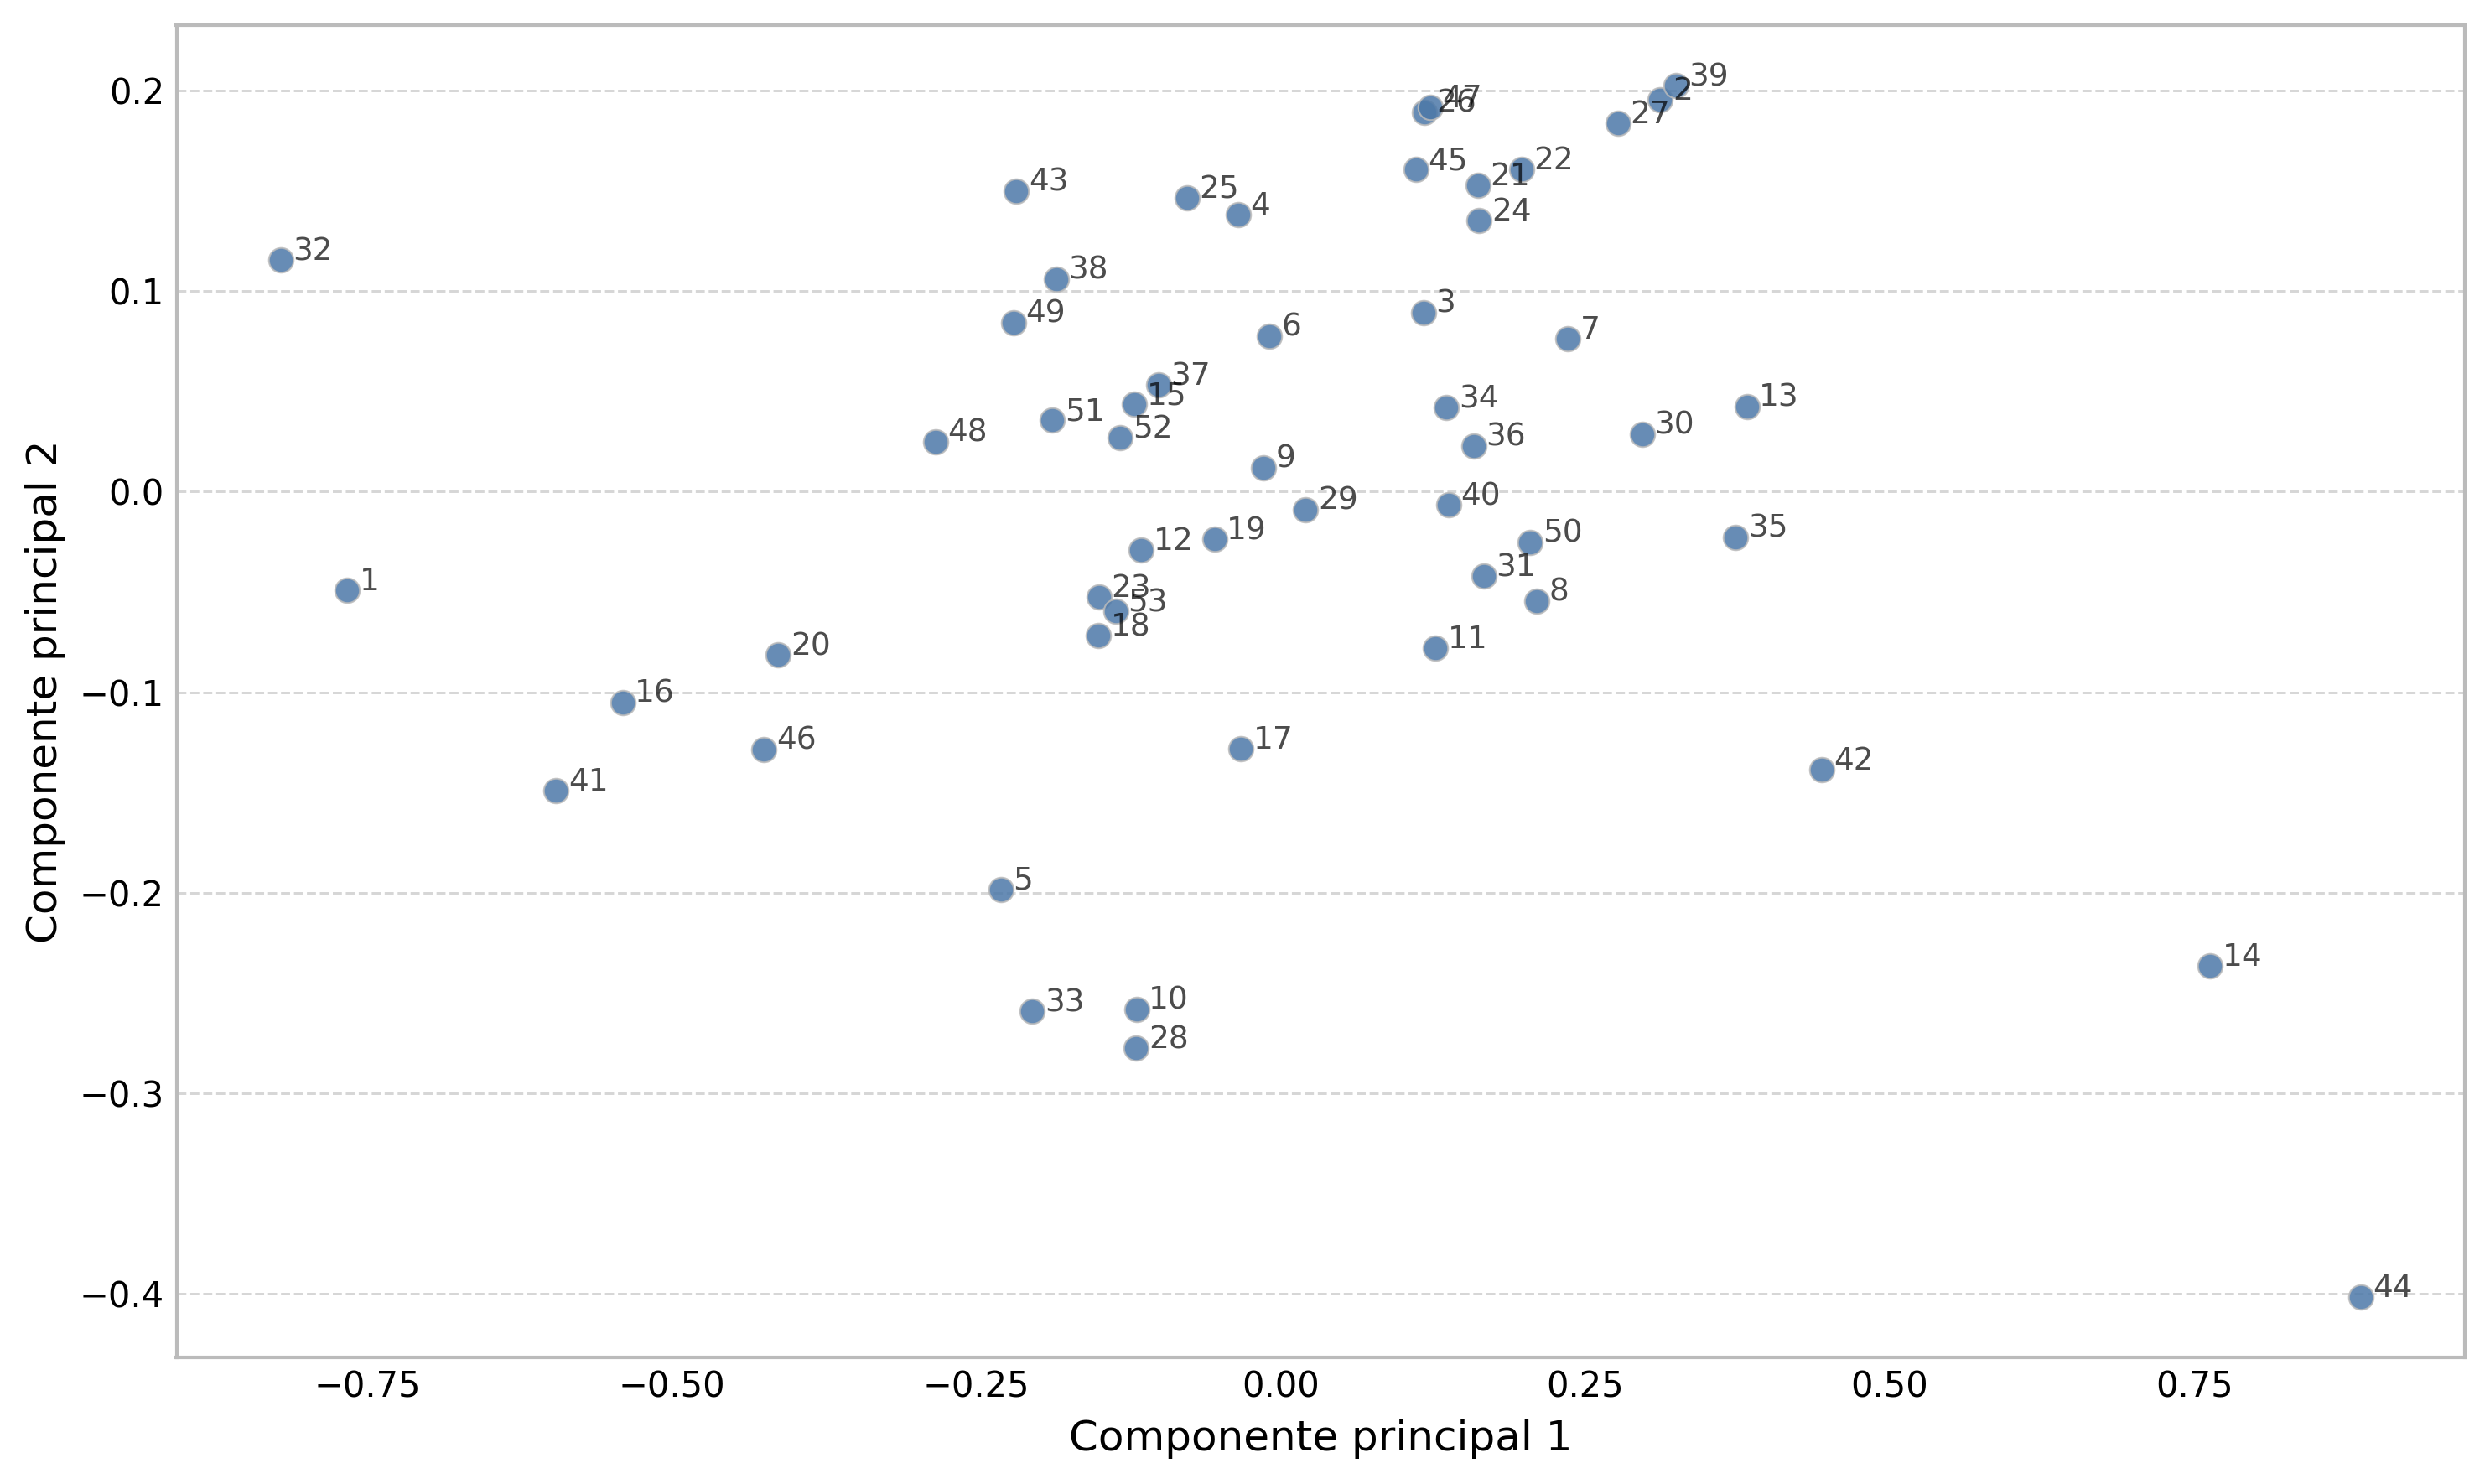

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

indice = []
for i in range(1, 54):
    indice.append(i)

# Reducimos la dimensión de los embeddings (pesos_embedding) a 2D con PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(pesos_embedding)

# Creamos la figura y los ejes con tamaño y resolución definidos
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Definimos colores para los puntos y los bordes
color_puntos = '#4C78A8'
color_bordes = '#BBBBBB'

# Aplicamos el color y grosor a los cuatro spines
for borde in ['top', 'bottom', 'left', 'right']:
    ax.spines[borde].set_color(color_bordes)
    ax.spines[borde].set_linewidth(1.0)

# Dibujamos los puntos de embedding en 2D
ax.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    color=color_puntos,
    edgecolor=color_bordes,
    linewidth=0.5,
    alpha=0.85,
    s=50,
    zorder=2
)

# Anotamos cada punto con su índice de paciente
for i, (x, y) in enumerate(embeddings_2d, start=1):
    ax.text(
        x + 0.01, y,
        str(i),
        fontsize=9,
        color='black',
        alpha=0.7
    )

# Etiquetamos los ejes
ax.set_xlabel("Componente principal 1", fontsize=12)
ax.set_ylabel("Componente principal 2", fontsize=12)

# Activamos la cuadrícula horizontal con el mismo color de bordes
ax.yaxis.grid(
    True,
    color=color_bordes,
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)
ax.set_axisbelow(True)

# Eliminamos los guiones de los ticks y ajustamos el tamaño de las etiquetas
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig("pca_15min.pdf")
plt.show()

### 2.2. t-SNE

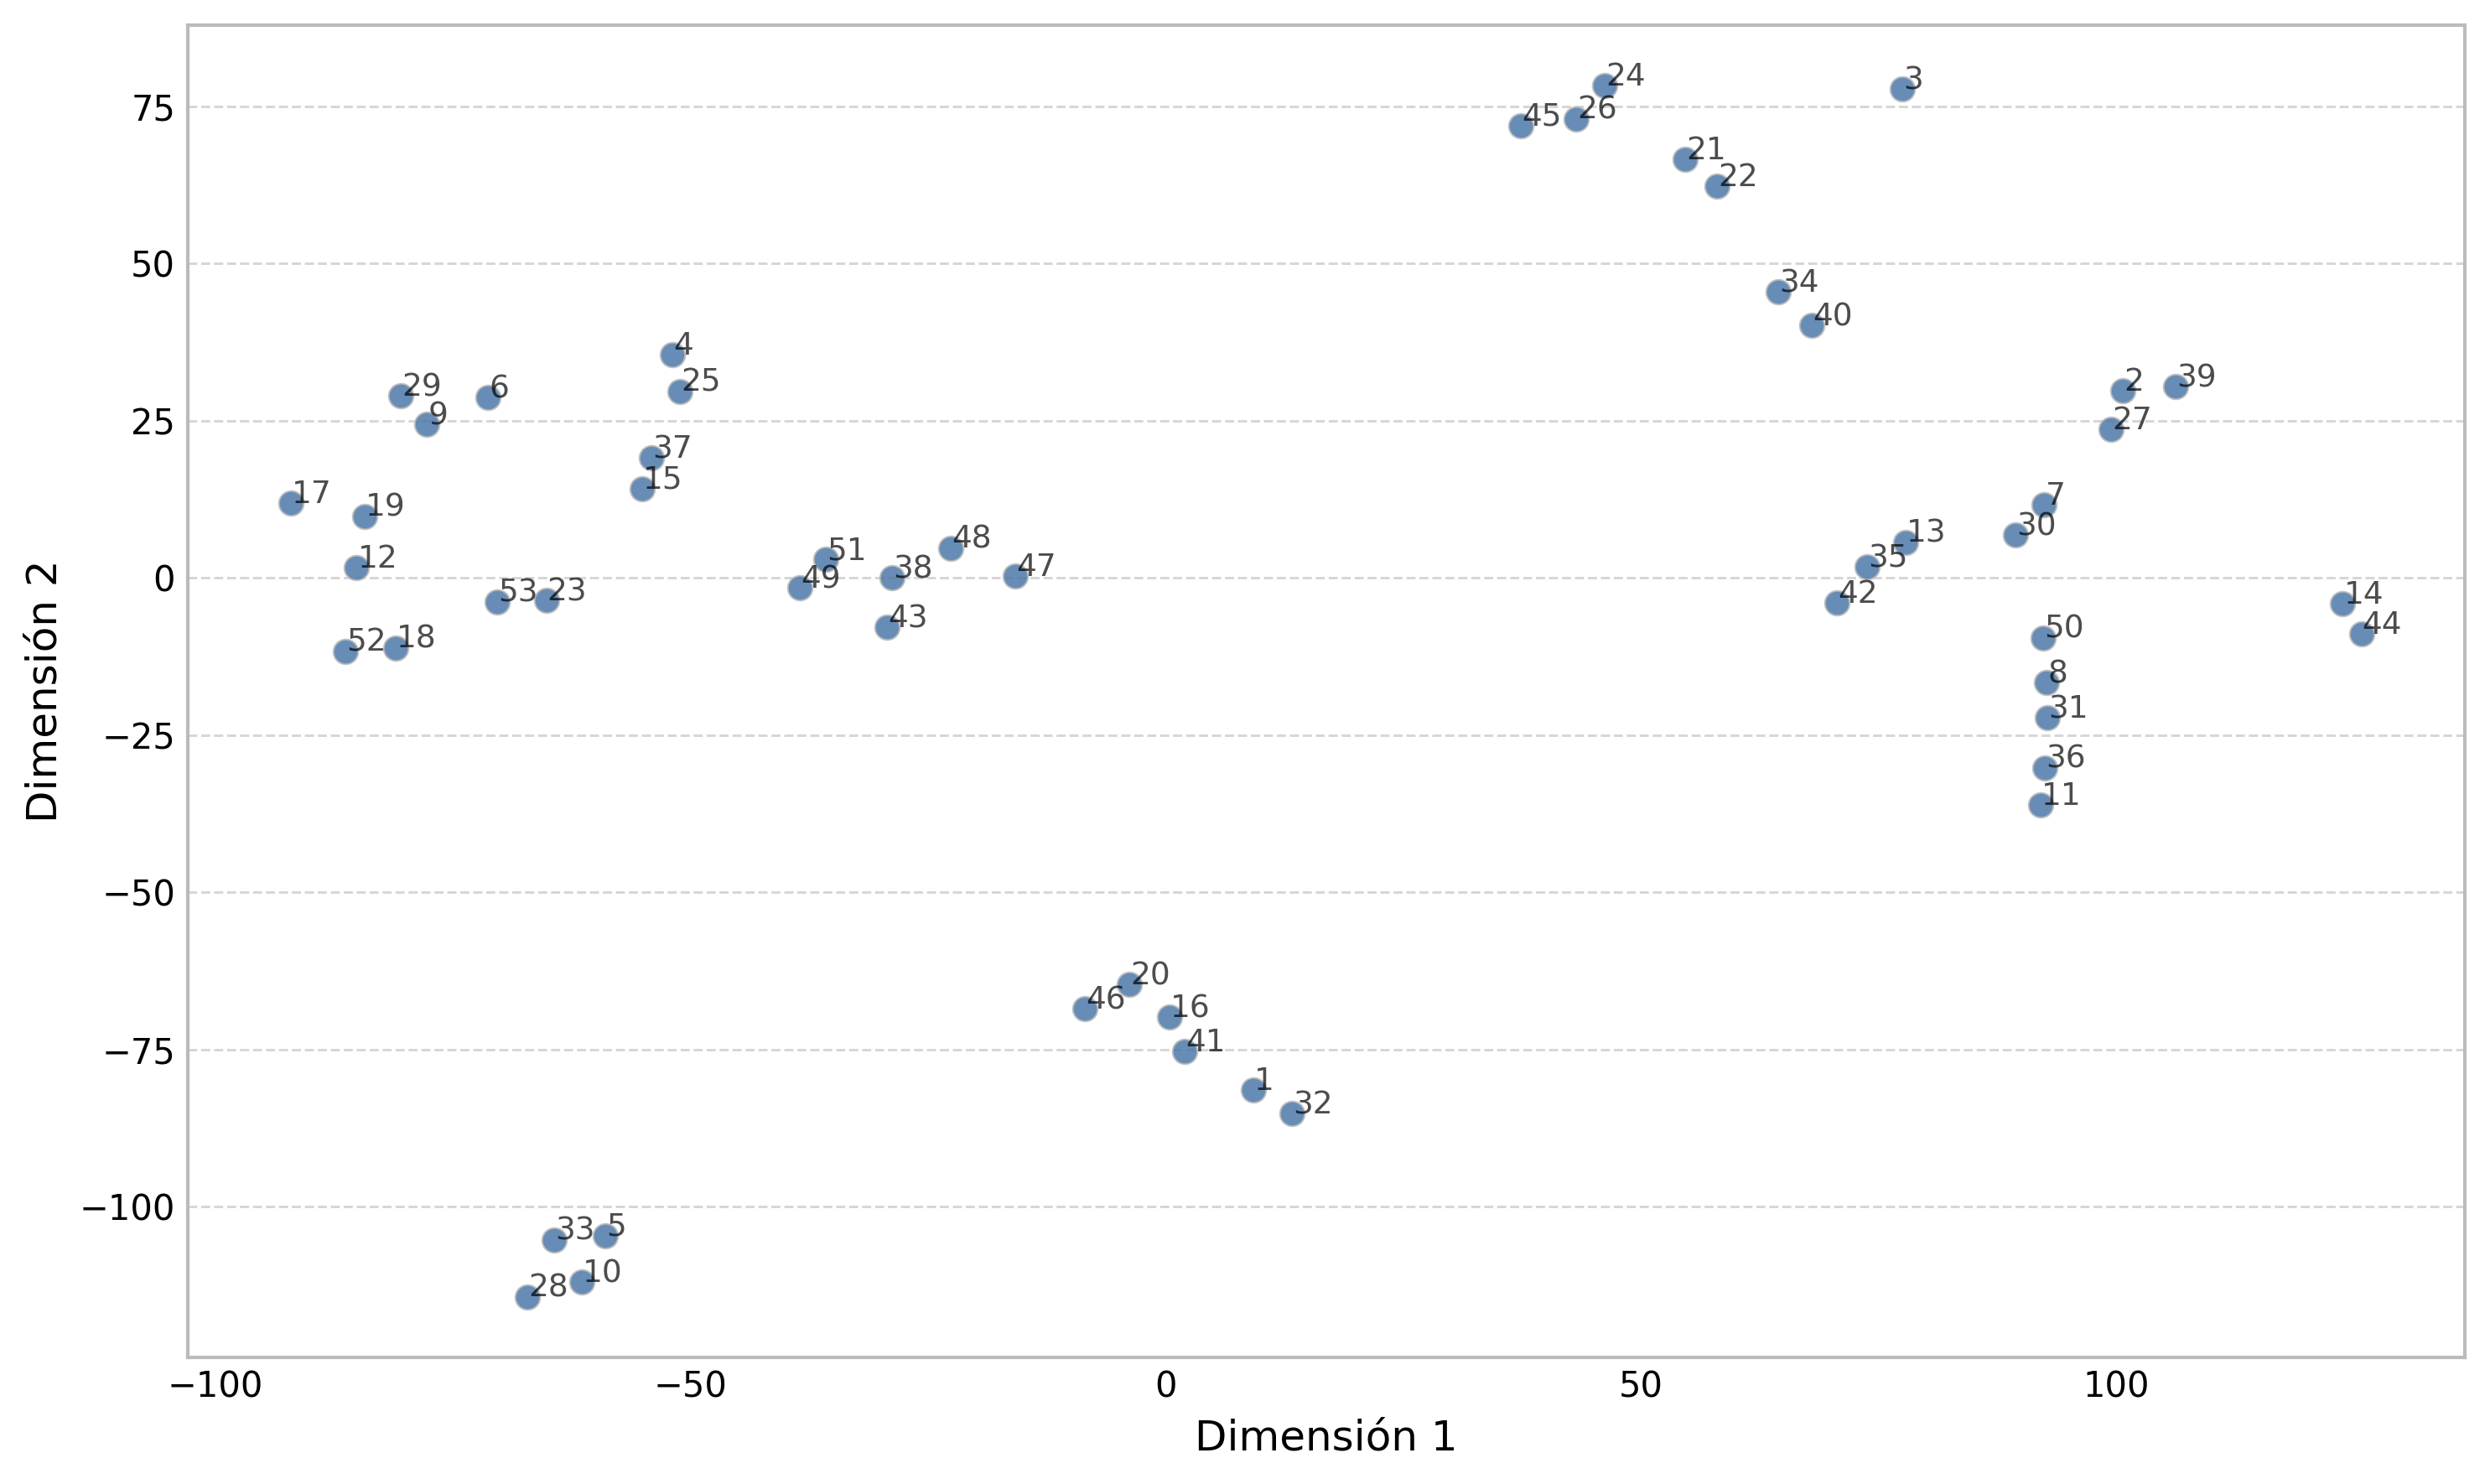

In [16]:
from sklearn.manifold import TSNE

# Aplicamos t-SNE a los pesos de los embedding
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=3,
)
embeddings_2d_tsne = tsne.fit_transform(pesos_embedding)

# Creamos figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
spine_color = '#BBBBBB'
point_color = '#4C78A8'

# Configuramos bordes
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(spine_color)
    ax.spines[spine].set_linewidth(1.0)

# Dibujamos el scatter plot de los embeddings 2D
ax.scatter(
    embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1],
    color=point_color,
    edgecolor=spine_color,
    linewidth=0.5,
    alpha=0.85,
    s=50,
    zorder=2
)

# Añadimos etiquetas de los pacientes
for i, clave in enumerate(indice):
    ax.text(embeddings_2d_tsne[i, 0] + 0.1, embeddings_2d_tsne[i, 1], clave, fontsize=9, alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel("Dimensión 1", fontsize=12)
ax.set_ylabel("Dimensión 2", fontsize=12)

# Grid horizontal
ax.yaxis.grid(True, color=spine_color, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)

# Ticks sin guiones
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig("tsne_perplexity_3_15_min.pdf", format='pdf')
plt.show()

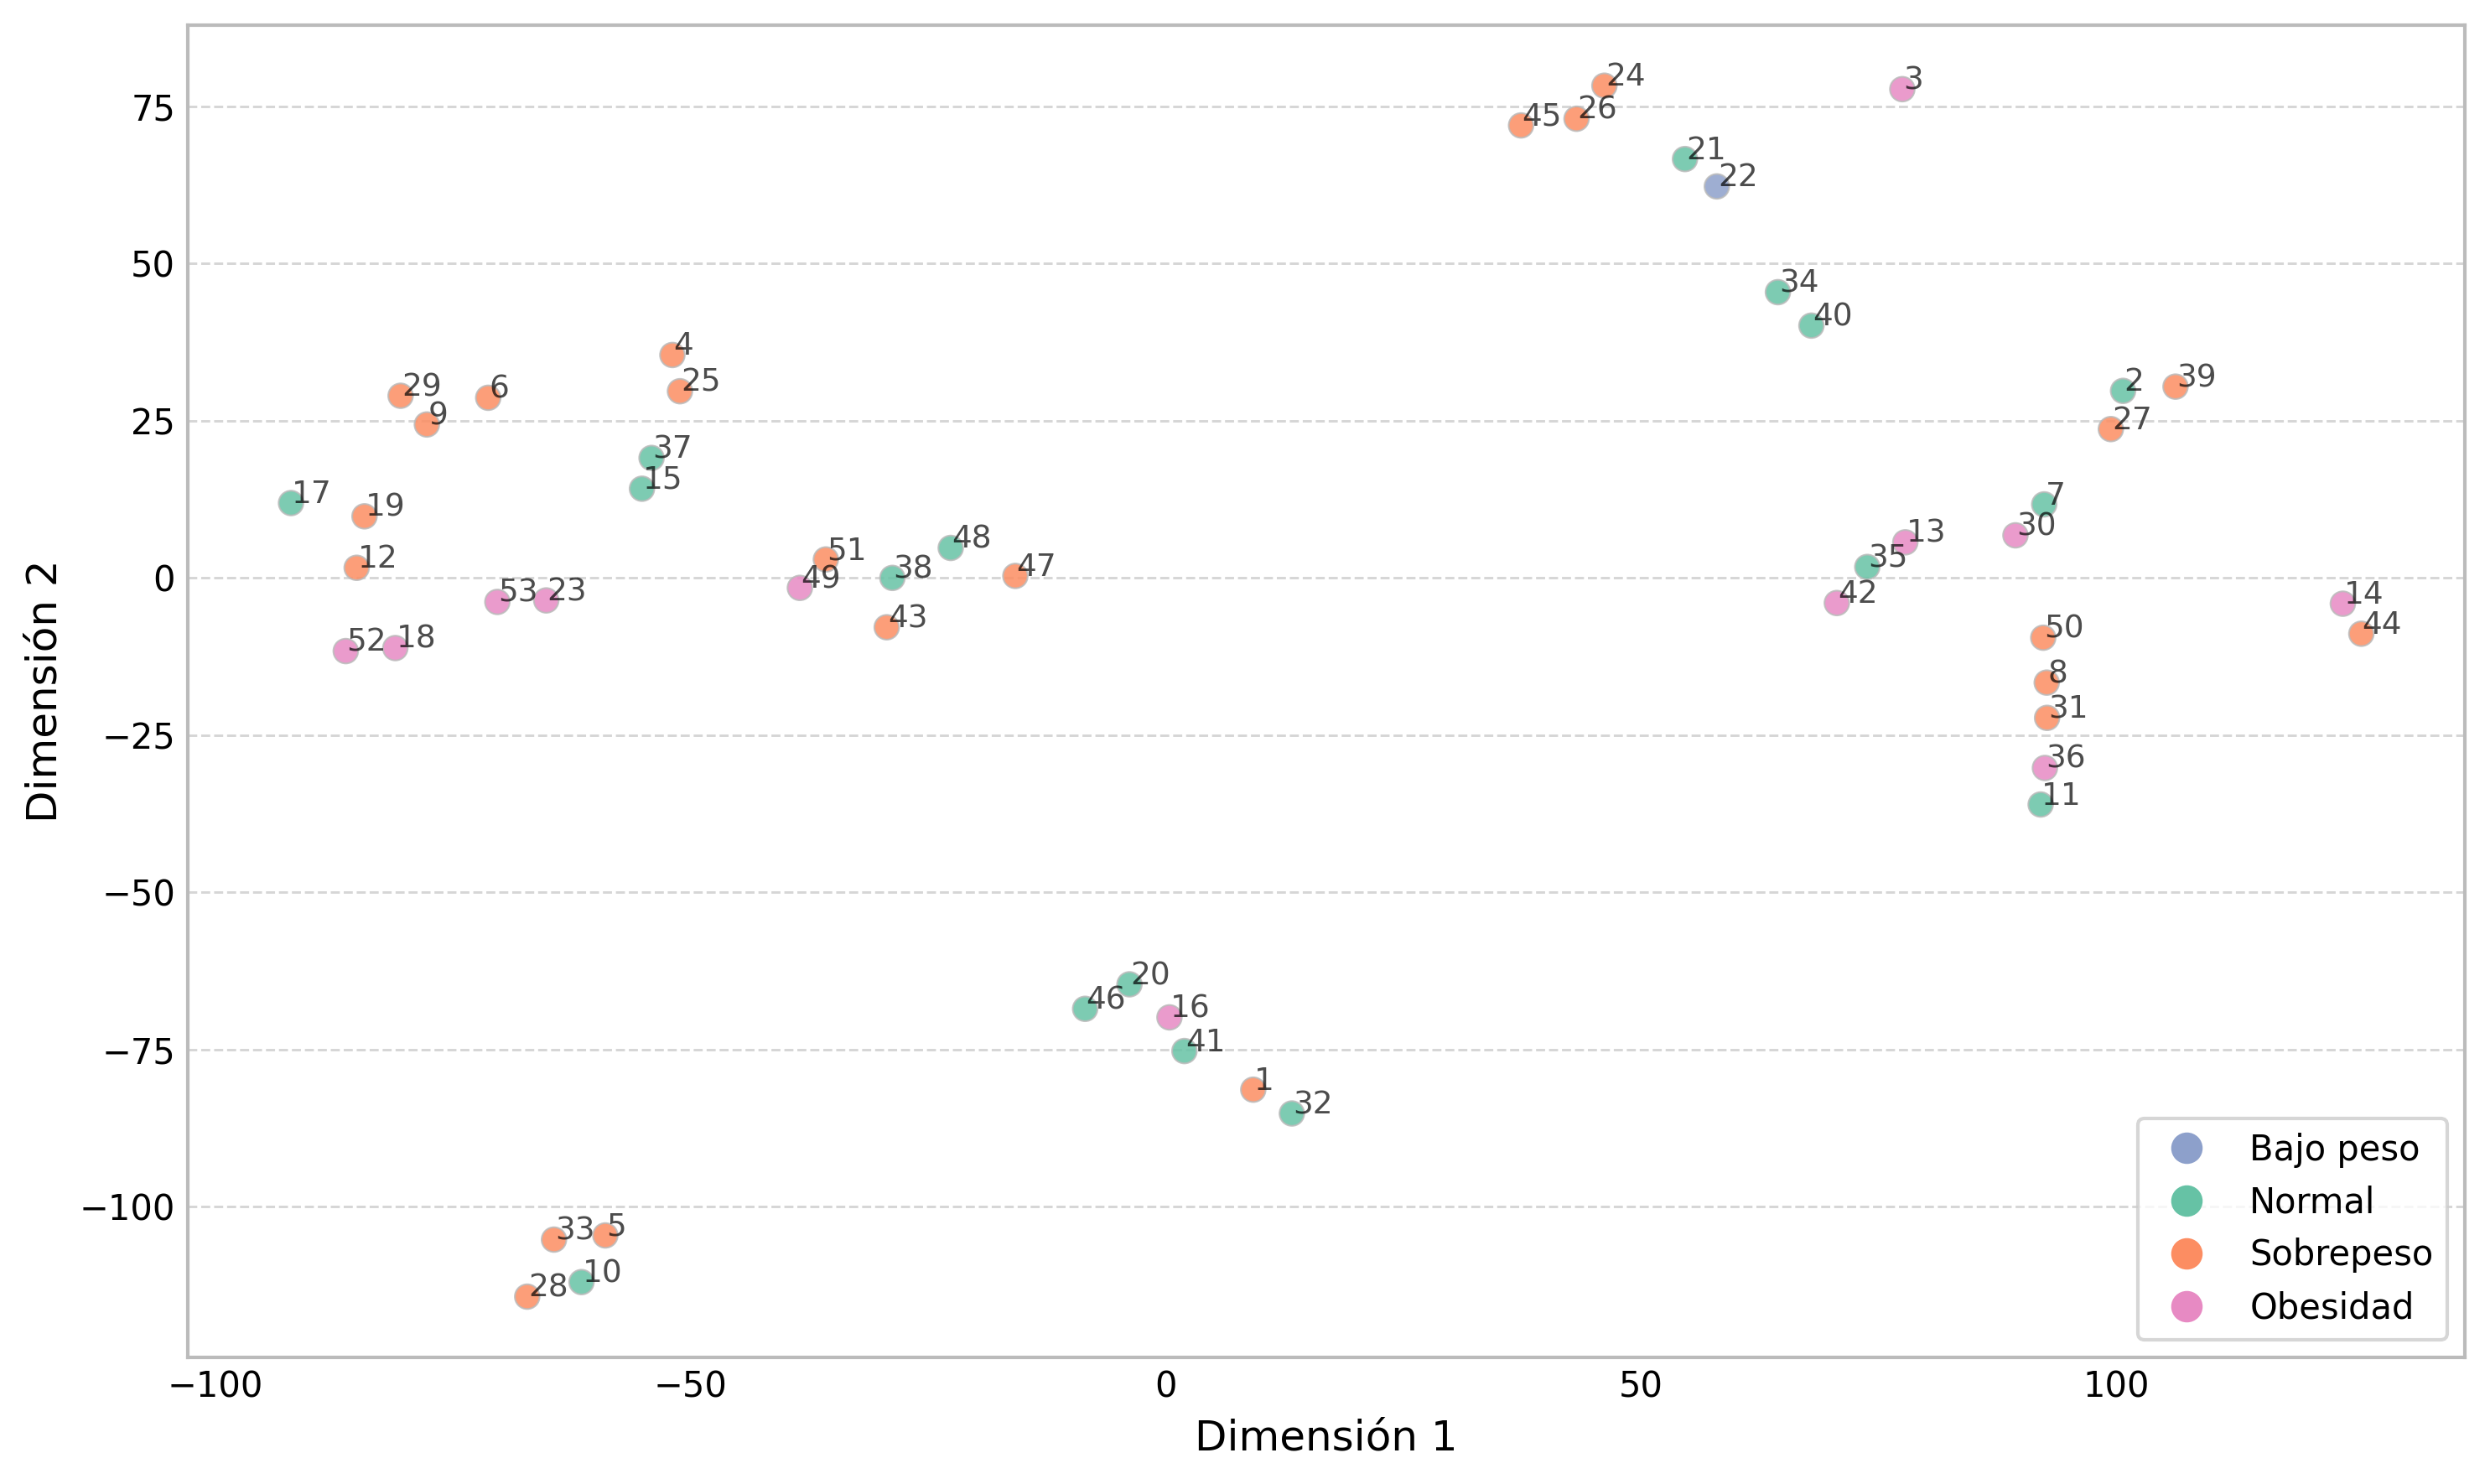

In [17]:
# Cargamos  el CSV con la información de los pacientes
ruta_csv = '/content/drive/My Drive/TFG/Datos/Info_Pacientes.csv'
df = pd.read_csv(ruta_csv)

# Obtenemos los datos sobre el IMC
imc = df['IMC'].tolist()

# Función para asignar rangos de IMC
def rango_imc(imc):
    if imc < 18.5:
        return 'Bajo peso'
    elif 18.5 <= imc < 25:
        return 'Normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

# Asignamos rangos a cada paciente
rango_imc_list = [rango_imc(i) for i in imc]

# Asignamos colores
color_map_imc = {
    'Bajo peso': '#8da0cb',     # azul suave
    'Normal': '#66c2a5',        # verde suave
    'Sobrepeso': '#fc8d62',     # naranja suave
    'Obesidad': '#e78ac3'       # rosa/violeta suave
}
colores_imc = [color_map_imc[r] for r in rango_imc_list]

# t-SNE con perplexity = 3
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=3,
)
embeddings_2d_tsne = tsne.fit_transform(pesos_embedding)

# Creamos figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Estilo general y bordes
spine_color = '#BBBBBB'
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(spine_color)
    ax.spines[spine].set_linewidth(1.0)

# Scatter plot con colores por IMC
scatter = ax.scatter(
    embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1],
    c=colores_imc,
    edgecolor=spine_color,
    linewidth=0.5,
    alpha=0.85,
    s=50,
    zorder=2
)

# Anotaciones de pacientes
for i, clave in enumerate(indice):
    ax.text(embeddings_2d_tsne[i, 0] + 0.1, embeddings_2d_tsne[i, 1], i+1, fontsize=9, alpha=0.7)

# Etiquetas y estilo
ax.set_xlabel("Dimensión 1", fontsize=12)
ax.set_ylabel("Dimensión 2", fontsize=12)

# Grid horizontal
ax.yaxis.grid(True, color=spine_color, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)

# Ticks sin guiones
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Leyenda
legend_elements = [
    mlines.Line2D([], [], color=color_map_imc['Bajo peso'], marker='o', linestyle='None', markersize=8, label='Bajo peso'),
    mlines.Line2D([], [], color=color_map_imc['Normal'], marker='o', linestyle='None', markersize=8, label='Normal'),
    mlines.Line2D([], [], color=color_map_imc['Sobrepeso'], marker='o', linestyle='None', markersize=8, label='Sobrepeso'),
    mlines.Line2D([], [], color=color_map_imc['Obesidad'], marker='o', linestyle='None', markersize=8, label='Obesidad'),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig("tsne_perplexity3_15min_imc.pdf", format='pdf')
plt.show()

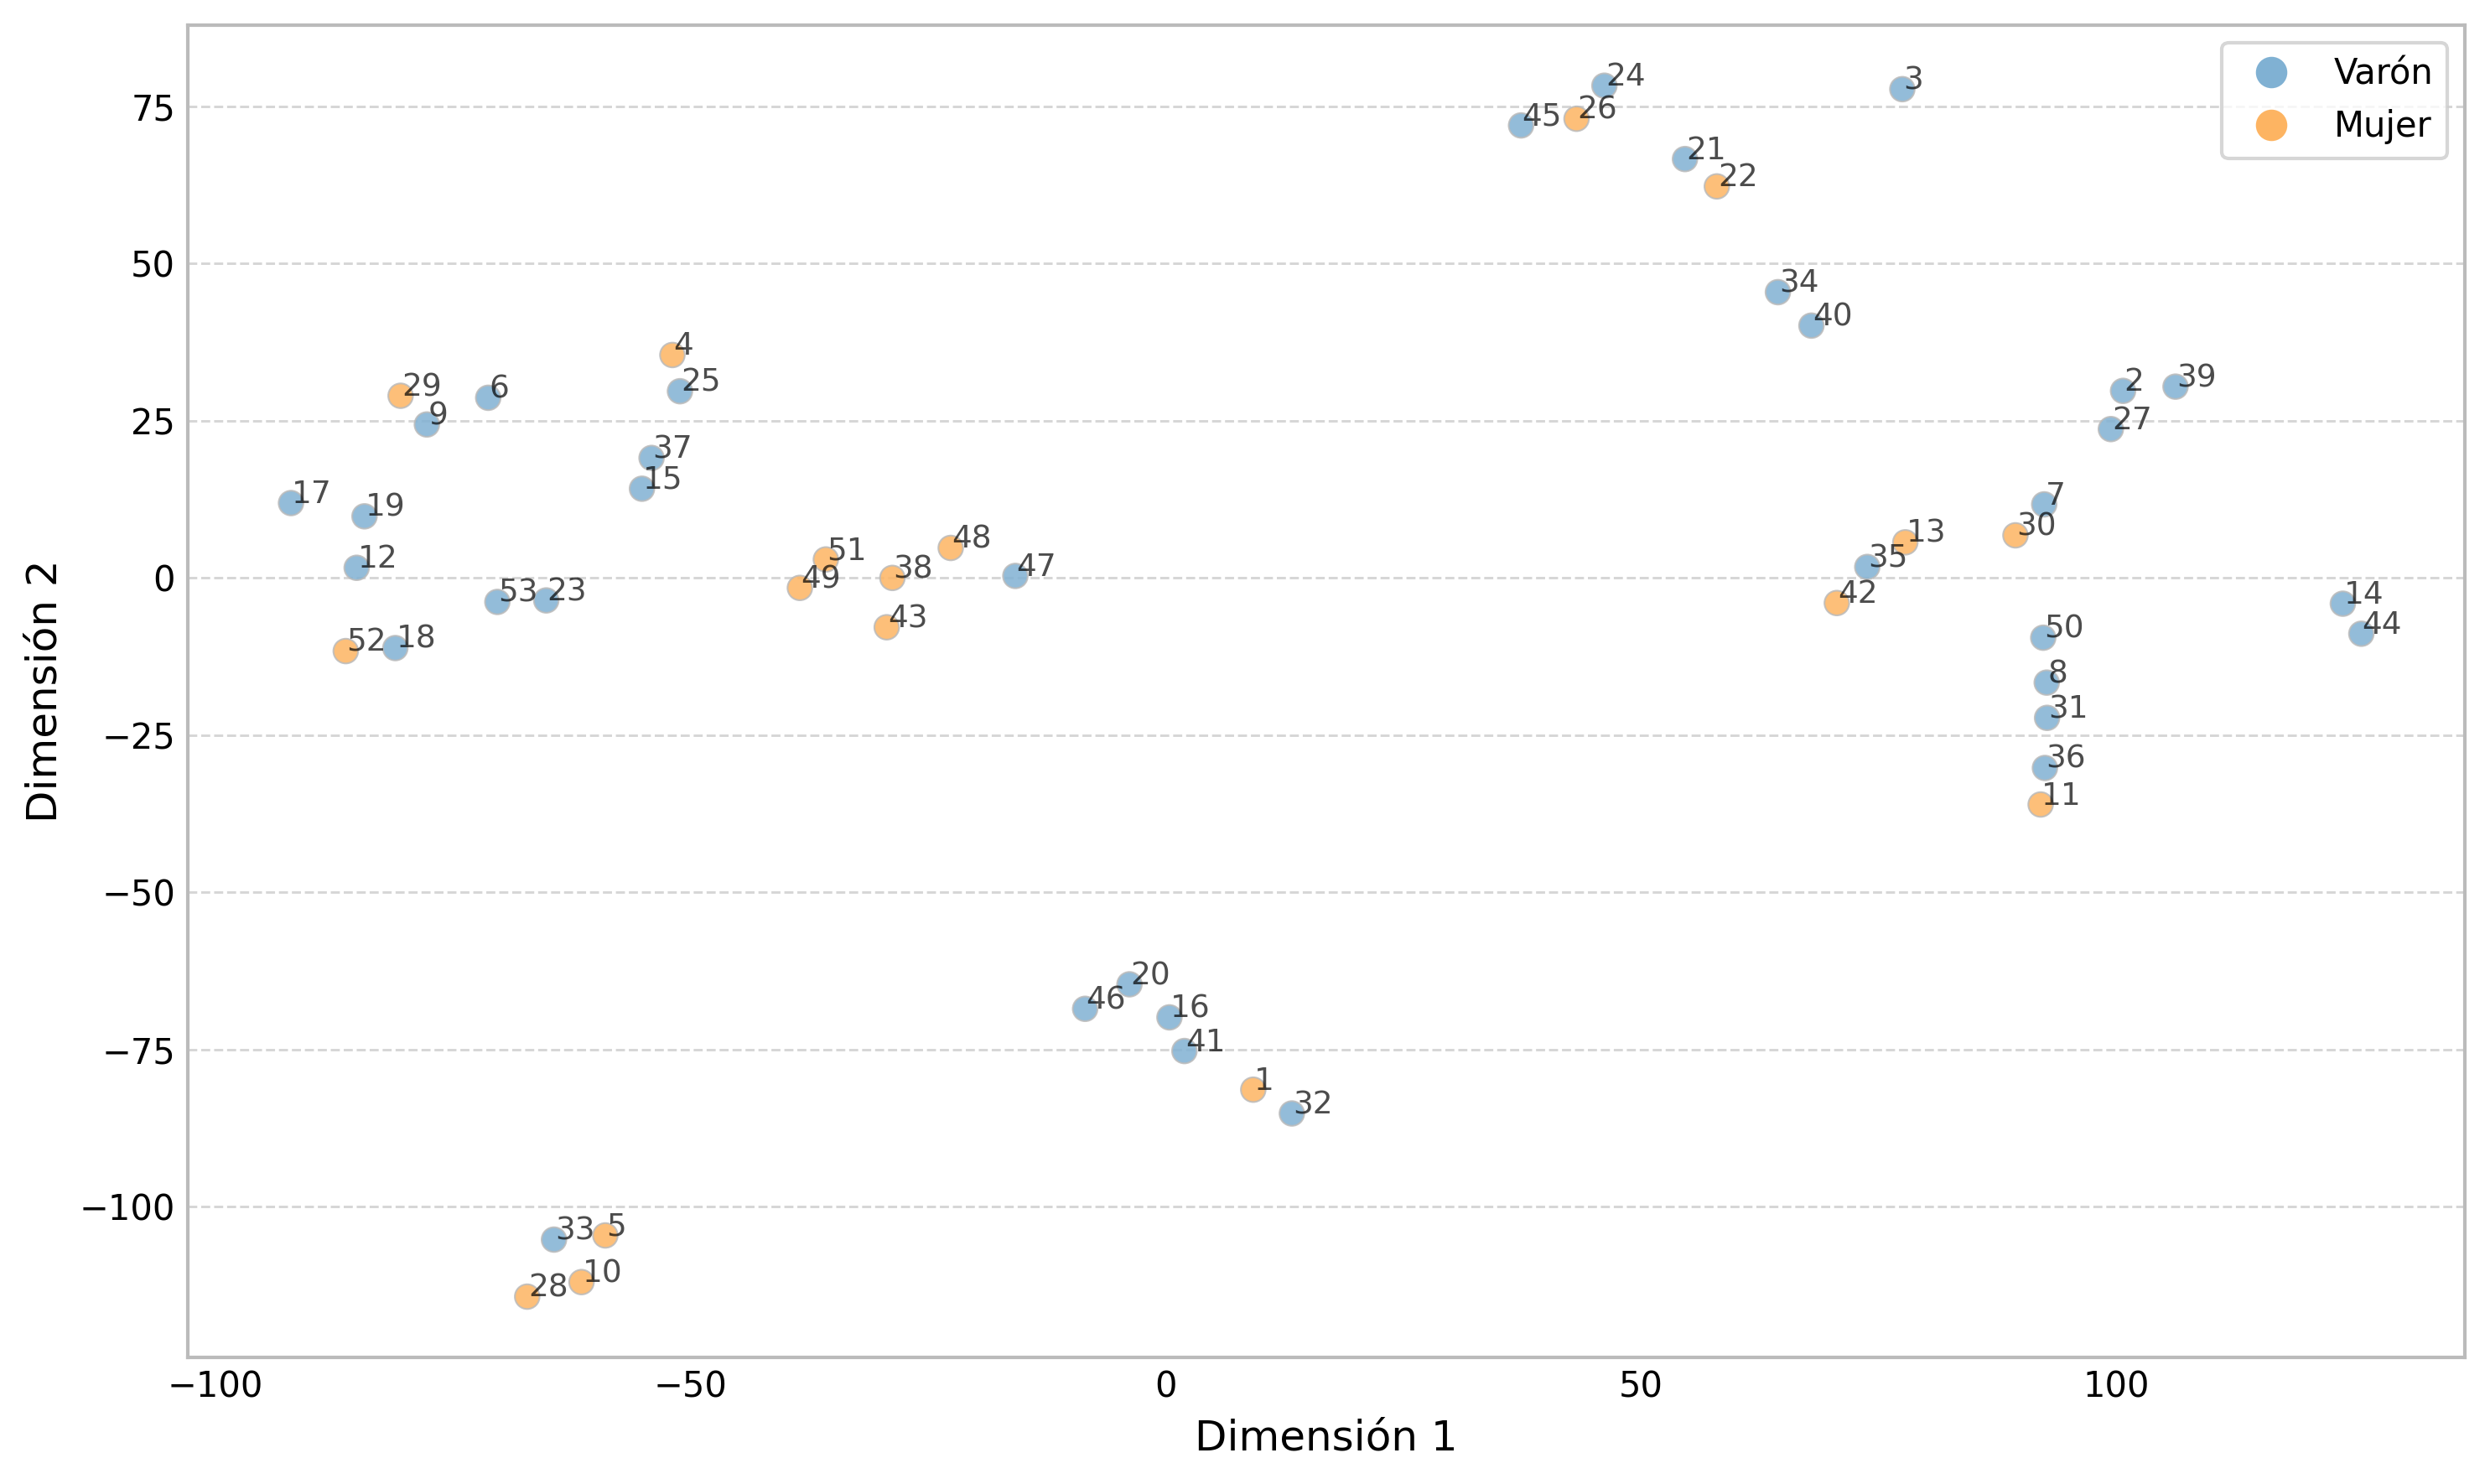

In [18]:
sexos = df['Sexo'].tolist()  # Lista de sexos

# Asignamos colores
color_map_sexo = {
    'Varón': '#80b1d3',
    'Mujer': '#fdb462'
}
colores_sexos = [color_map_sexo[s] for s in sexos]

# Aplicamos t-SNE con perplexity = 3
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=3,
)
embeddings_2d_tsne = tsne.fit_transform(pesos_embedding)

# Creamos figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Estilo general
spine_color = '#BBBBBB'

# Bordes en gris claro
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(spine_color)
    ax.spines[spine].set_linewidth(1.0)

# Scatter con colores por sexo
scatter = ax.scatter(
    embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1],
    c=colores_sexos,
    edgecolor=spine_color,
    linewidth=0.5,
    alpha=0.85,
    s=50,
    zorder=2
)

# Anotaciones de pacientes
for i, clave in enumerate(indice):
    ax.text(embeddings_2d_tsne[i, 0] + 0.1, embeddings_2d_tsne[i, 1], clave, fontsize=9, alpha=0.7)

# Etiquetas y título
ax.set_xlabel("Dimensión 1", fontsize=12)
ax.set_ylabel("Dimensión 2", fontsize=12)

# Grid horizontal
ax.yaxis.grid(True, color=spine_color, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)

# Ticks sin guiones
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Leyenda
legend_elements = [
    mlines.Line2D([], [], color=color_map_sexo['Varón'], marker='o', linestyle='None', markersize=8, label='Varón'),
    mlines.Line2D([], [], color=color_map_sexo['Mujer'], marker='o', linestyle='None', markersize=8, label='Mujer'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Guardamos figura en pdf y representamos
plt.tight_layout()
plt.savefig("tsne_perplexity3_15min_sexo.pdf", format='pdf')
plt.show()

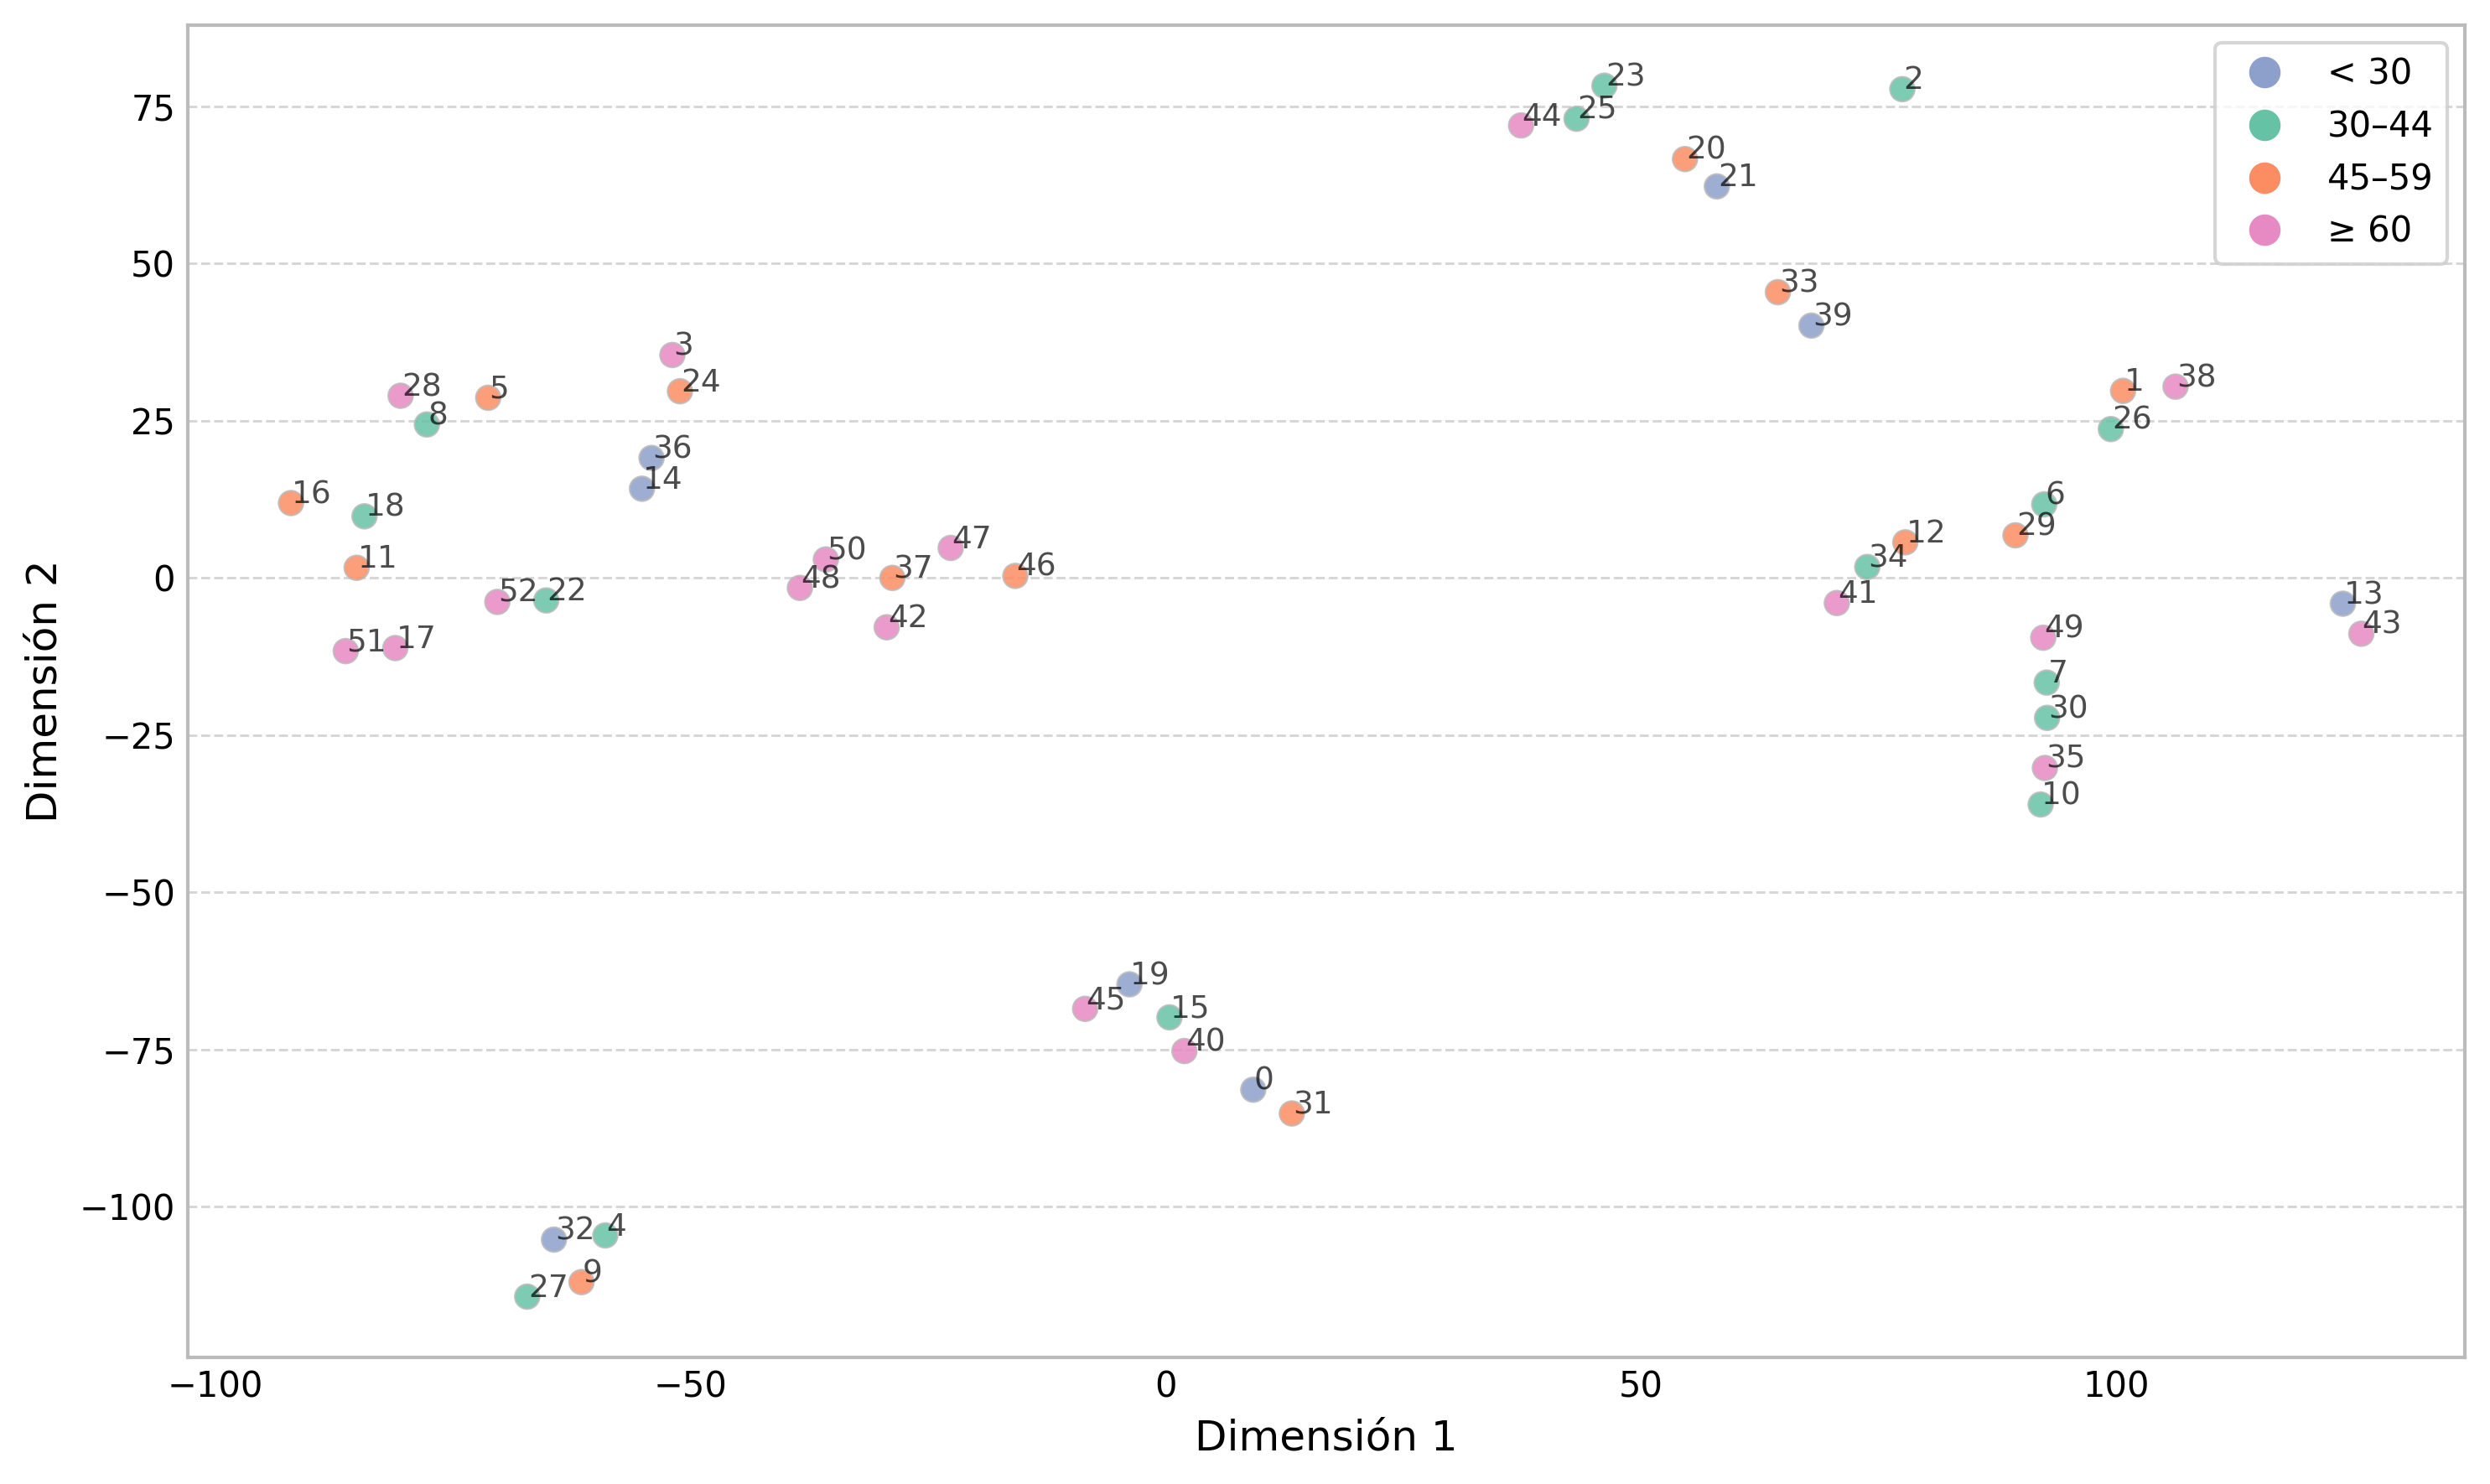

In [19]:
# Cargamos edades
edades = df['Año de nacimiento'].tolist()
edades = [2024 - edad for edad in edades]

# Asignamos color
def color_por_edad(edad):
    if edad < 30:
        return '#8da0cb'  # azul claro
    elif 30 <= edad < 45:
        return '#66c2a5'  # verde suave
    elif 45 <= edad < 60:
        return '#fc8d62'  # naranja pálido
    else:
        return '#e78ac3'  # rosa lavanda

colores_edad = [color_por_edad(e) for e in edades]

# t-SNE
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
embeddings_2d_tsne = tsne.fit_transform(pesos_embedding)

# Creamos figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
spine_color = '#BBBBBB'

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(spine_color)
    ax.spines[spine].set_linewidth(1.0)

# Scatter
ax.scatter(
    embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1],
    c=colores_edad,
    edgecolor=spine_color,
    linewidth=0.5,
    alpha=0.85,
    s=50
)

# Etiquetas
for i, clave in enumerate(df.index):
    ax.text(embeddings_2d_tsne[i, 0] + 0.1, embeddings_2d_tsne[i, 1], str(clave), fontsize=9, alpha=0.7)

ax.set_xlabel("Dimensión 1", fontsize=12)
ax.set_ylabel("Dimensión 2", fontsize=12)
ax.yaxis.grid(True, color=spine_color, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Leyenda
legend_elements = [
    mlines.Line2D([], [], color='#8da0cb', marker='o', linestyle='None', markersize=8, label='< 30'),
    mlines.Line2D([], [], color='#66c2a5', marker='o', linestyle='None', markersize=8, label='30–44'),
    mlines.Line2D([], [], color='#fc8d62', marker='o', linestyle='None', markersize=8, label='45–59'),
    mlines.Line2D([], [], color='#e78ac3', marker='o', linestyle='None', markersize=8, label='≥ 60'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Guardamos en pdf y representamos
plt.tight_layout()
plt.savefig("tsne_perplexity3_15min_edad.pdf", format='pdf')
plt.show()

### 2.3. UMAP

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


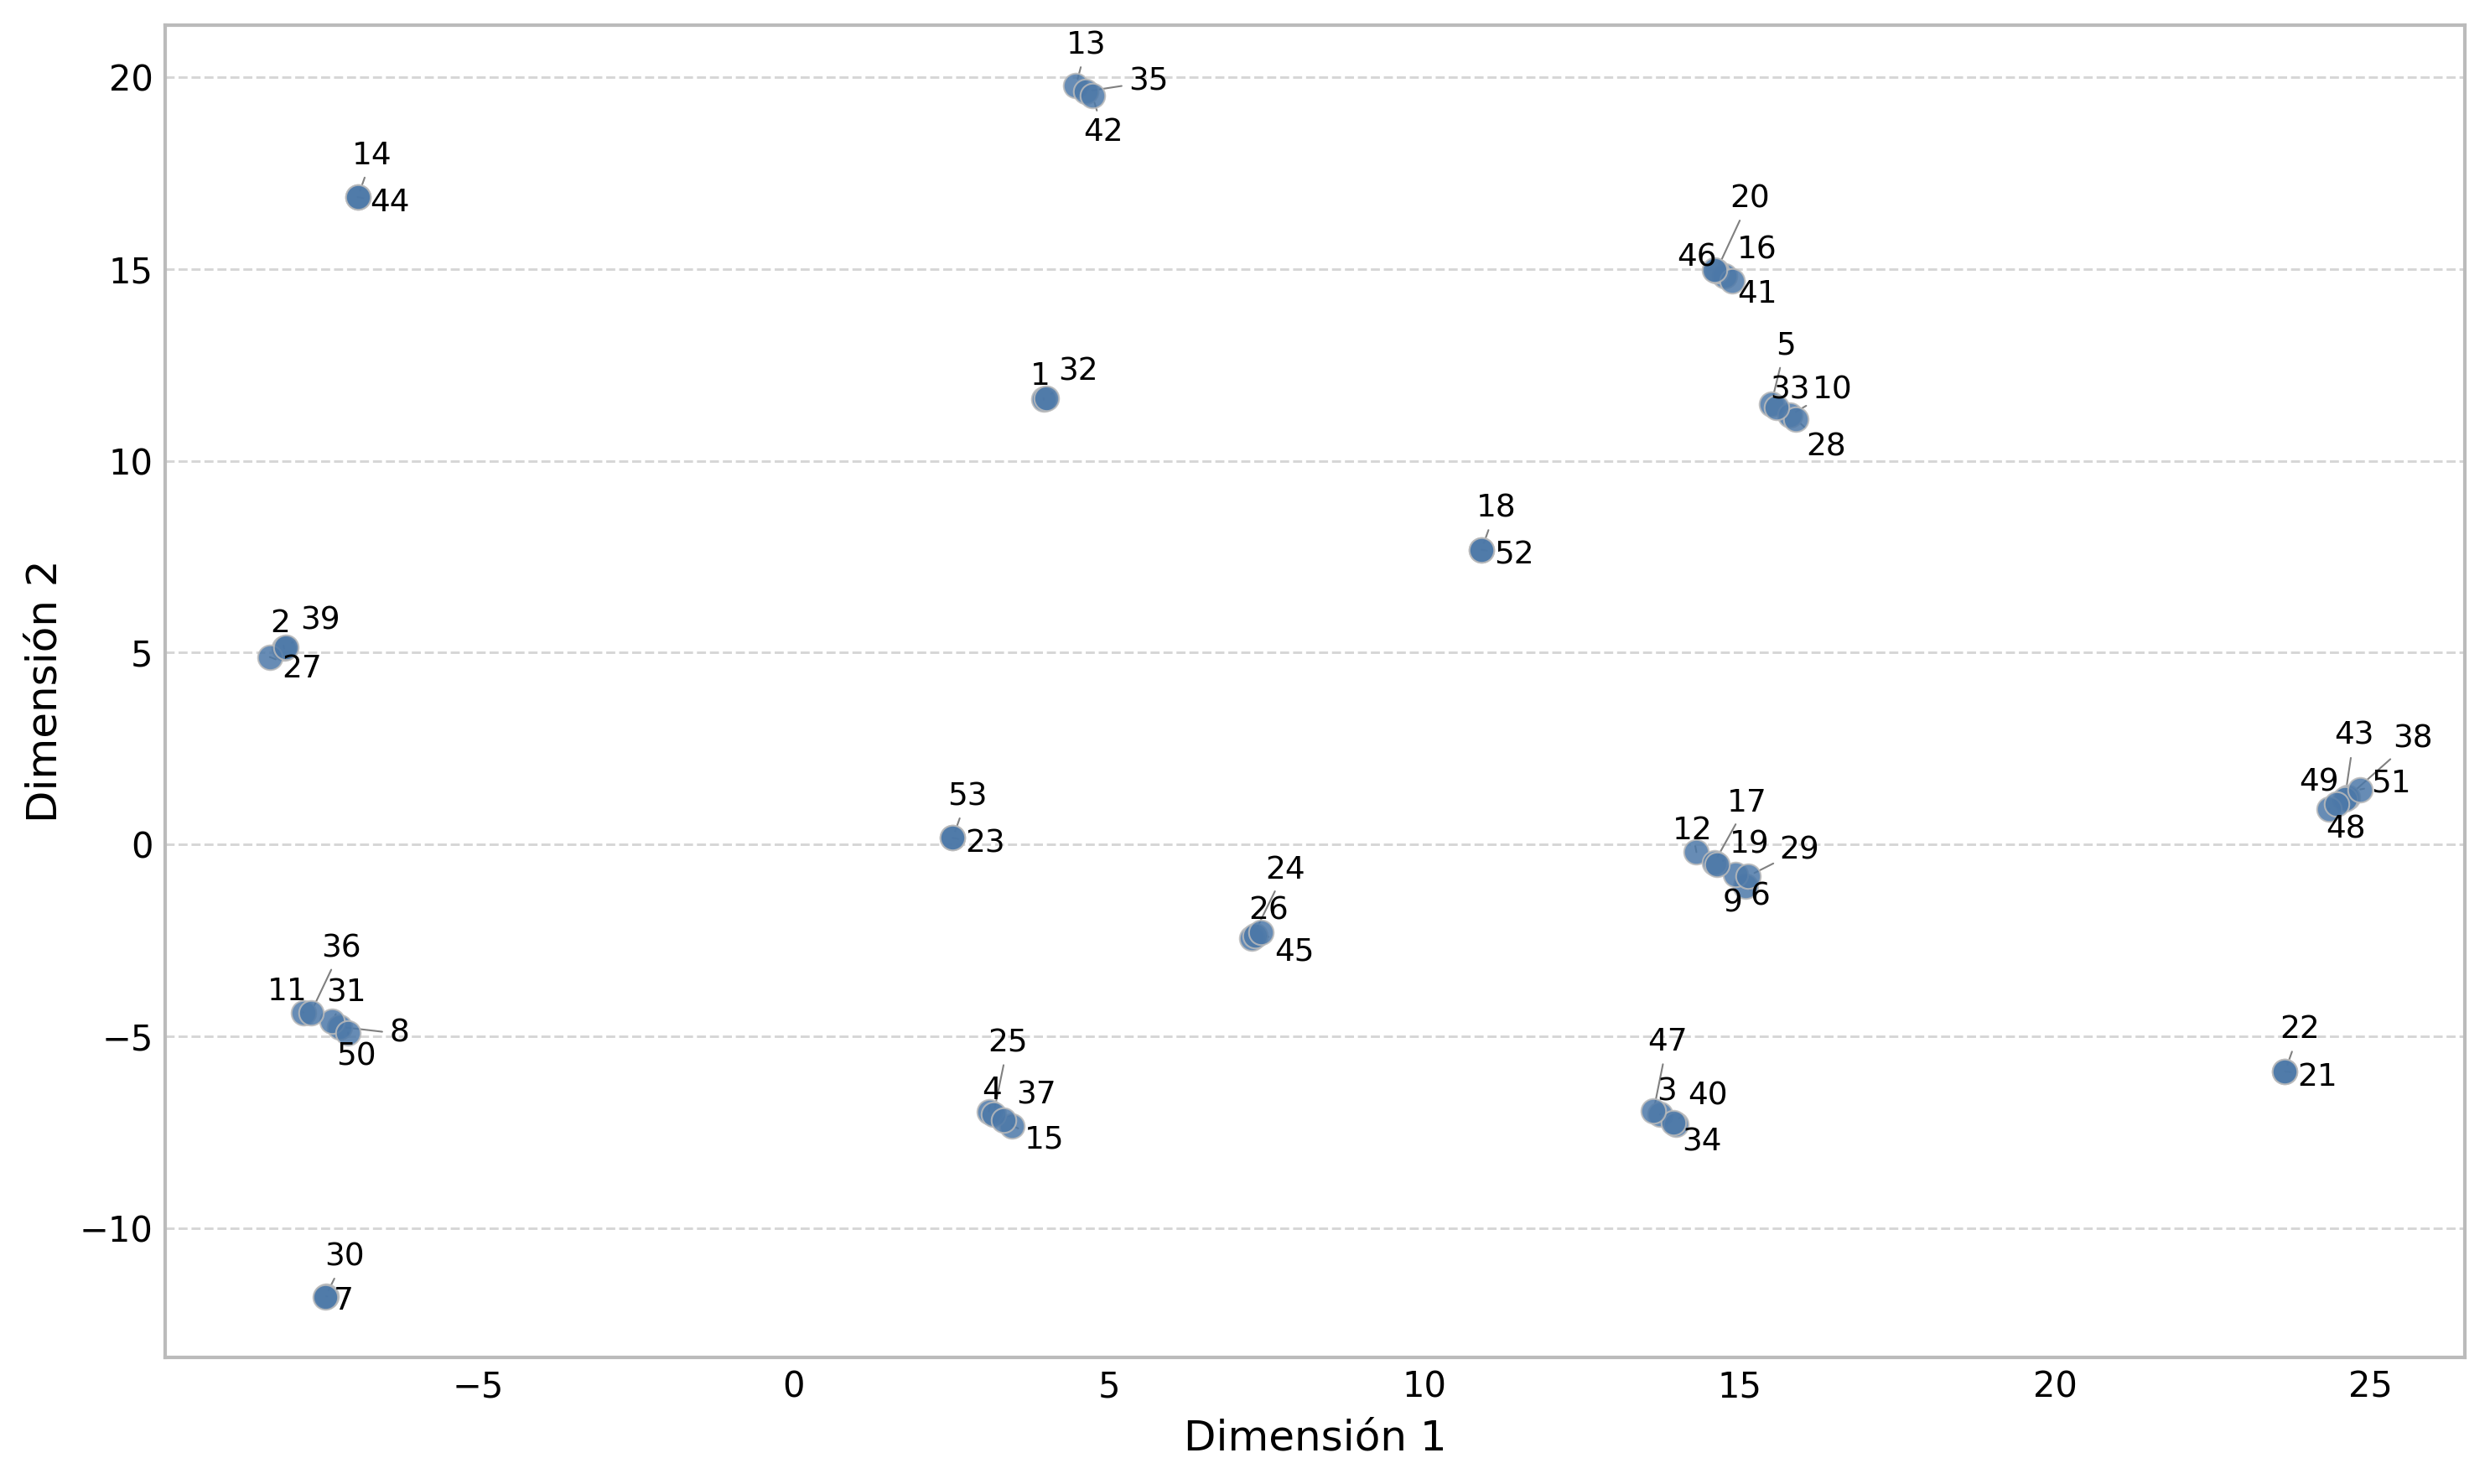

In [30]:
import umap
from adjustText import adjust_text

# Reducimos los embeddings a 2D con UMAP (n_neighbors=2)
reducer = umap.UMAP(
    n_neighbors=2,
    min_dist=0.1,
    n_components=2,
    metric='euclidean',
    random_state=42
)
umap_2d = reducer.fit_transform(pesos_embedding)

# Creamos figura y eje con estilo profesional
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
color_borde = '#BBBBBB'
color_punto = '#4C78A8'

# Configuramos los bordes de los ejes
for borde in ['top', 'bottom', 'left', 'right']:
    ax.spines[borde].set_color(color_borde)
    ax.spines[borde].set_linewidth(1.0)

# Dibujamos los puntos resultantes de UMAP
ax.scatter(
    umap_2d[:, 0],
    umap_2d[:, 1],
    color=color_punto,
    edgecolor=color_borde,
    linewidth=0.5,
    alpha=0.85,
    s=50,
    zorder=2
)

# Anotamos cada punto con su índice de paciente
texts = []
for i in range(umap_2d.shape[0]):
    x, y = umap_2d[i]
    texts.append(
        ax.text(
            x, y,
            str(i+1),
            fontsize=9,
            color='black'
        )
    )
# Ajustamos las etiquetas para evitar solapamientos
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Etiquetamos los ejes y añadimos cuadrícula horizontal
ax.set_xlabel('Dimensión 1', fontsize=12)
ax.set_ylabel('Dimensión 2', fontsize=12)
ax.yaxis.grid(
    True,
    color=color_borde,
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)
ax.set_axisbelow(True)

# Eliminamos los guiones de los ticks y ajustamos el tamaño de las etiquetas
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig('umap_15min_n4.pdf')
plt.show()


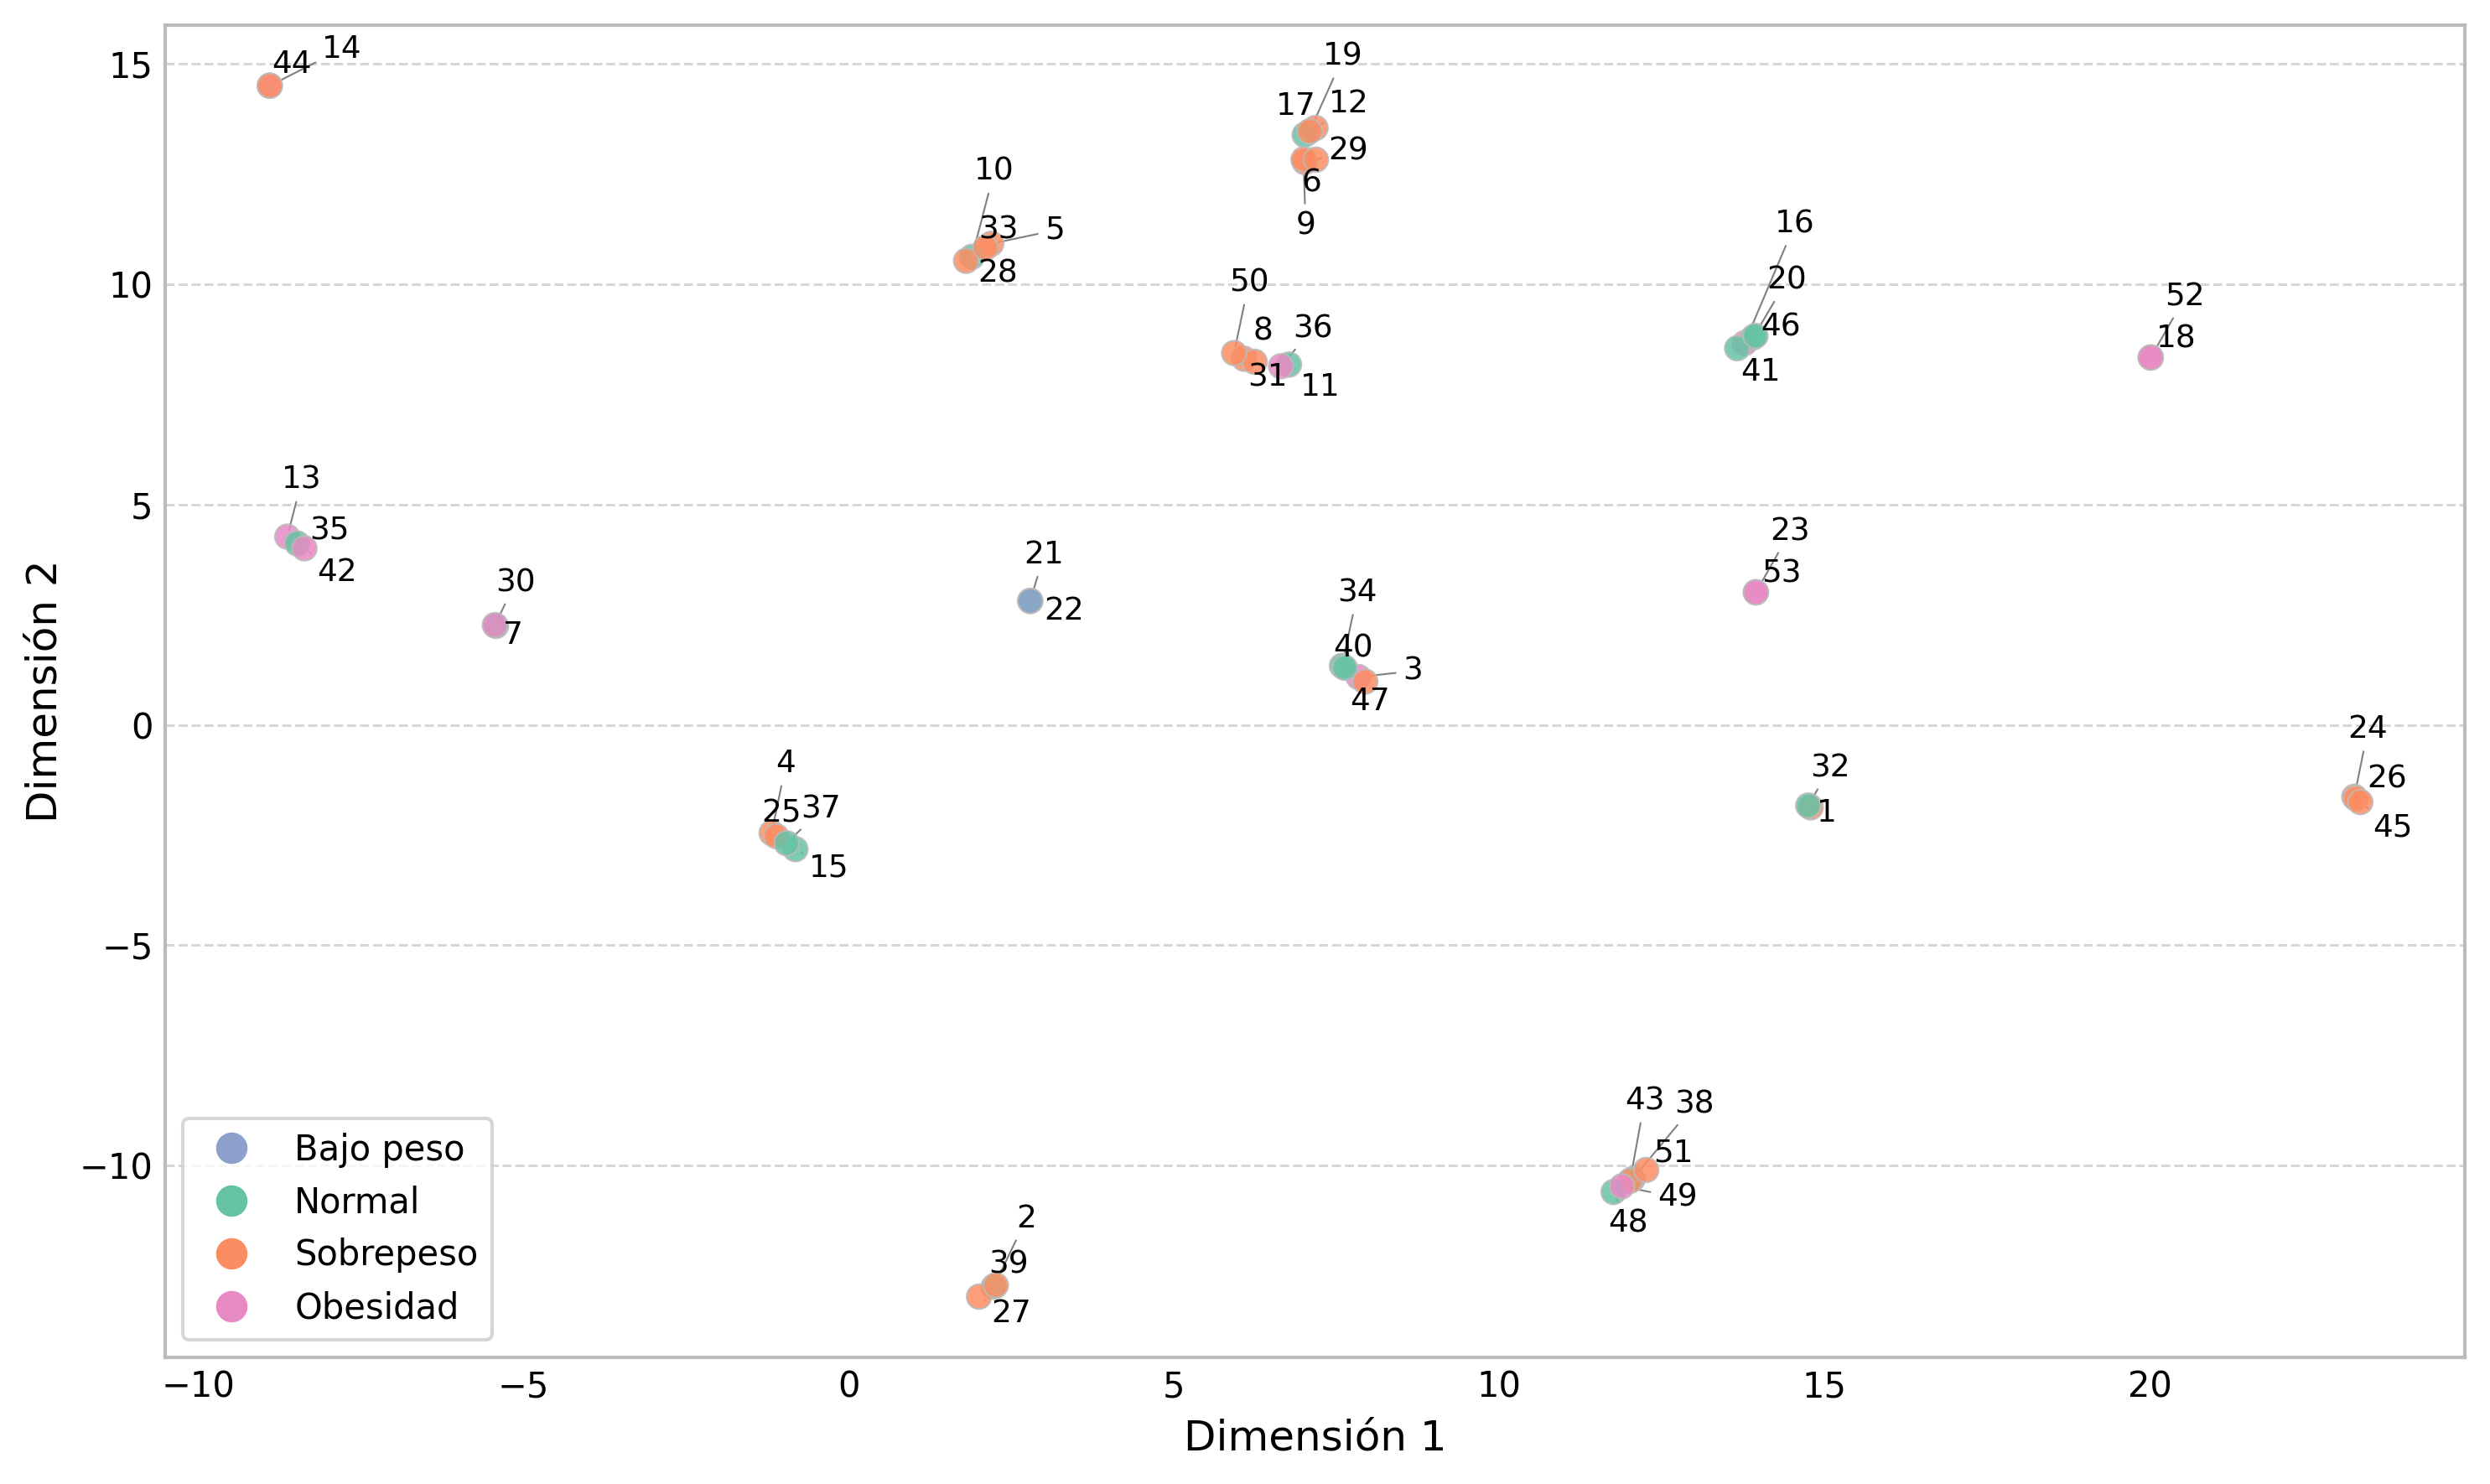

In [29]:
# Definimos la paleta de colores para categorías de IMC
paleta_imc = {
    'Bajo peso': '#8da0cb',
    'Normal':    '#66c2a5',
    'Sobrepeso': '#fc8d62',
    'Obesidad':  '#e78ac3'
}
colores = [paleta_imc[c] for c in rango_imc_list]

# Creamos figura y eje con estilo profesional
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
color_borde = '#BBBBBB'

# Configuramos los bordes de los ejes
for borde in ['top', 'bottom', 'left', 'right']:
    ax.spines[borde].set_color(color_borde)
    ax.spines[borde].set_linewidth(1.0)

# Dibujamos scatter coloreado según IMC
ax.scatter(
    umap_2d[:, 0],
    umap_2d[:, 1],
    c=colores,
    edgecolor=color_borde,
    linewidth=0.5,
    alpha=0.85,
    s=50,
    zorder=2
)

# Anotamos cada punto con su índice de paciente
texts = []
for i in range(umap_2d.shape[0]):
    x, y = umap_2d[i]
    texts.append(ax.text(x, y, str(i+1), fontsize=9, color='black'))

# Ajustamos las etiquetas para evitar solapamientos
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Etiquetamos los ejes y añadimos cuadrícula horizontal
ax.set_xlabel('Dimensión 1', fontsize=12)
ax.set_ylabel('Dimensión 2', fontsize=12)
ax.yaxis.grid(True, color=color_borde, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)

# Eliminamos los guiones de los ticks y ajustamos su tamaño
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Leyenda
legend_elements = [
    mlines.Line2D([], [], color=color_map_imc['Bajo peso'], marker='o', linestyle='None', markersize=8, label='Bajo peso'),
    mlines.Line2D([], [], color=color_map_imc['Normal'], marker='o', linestyle='None', markersize=8, label='Normal'),
    mlines.Line2D([], [], color=color_map_imc['Sobrepeso'], marker='o', linestyle='None', markersize=8, label='Sobrepeso'),
    mlines.Line2D([], [], color=color_map_imc['Obesidad'], marker='o', linestyle='None', markersize=8, label='Obesidad'),
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=10)

# Guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig('umap_15min_n4_imc.pdf')
plt.show()



In [31]:
# Filtrar los pacientes de interes para analisis
pacientes_interes = ['811-5', '811-10', '811-28', '811-33']
df_filtrado = df[df['Record ID'].isin(pacientes_interes)]

# Seleccionar columnas clínicas relevantes para análisis
columnas_interes = [
    'Record ID', 'Edad al momento de ser incluido en el proyecto', 'Sexo',
    'Tipo de diabetes', 'IMC', 'Tipo de tratamiento',
    'Unidades totales de insulina (UI/24h)', 'HbA1c valor', 'Promedio de hemoglobinas glicadas',
    '¿Existen complicaciones microvasculares?', '¿Existen complicaciones macrovasculares?'
]

# Mostrar la información seleccionada
df_filtrado[columnas_interes].T

,4,9,27,32
Record ID,811-5,811-10,811-28,811-33
Edad al momento de ser incluido en el proyecto,39,52,32,23
Sexo,Mujer,Mujer,Mujer,Varón
Tipo de diabetes,Diabetes mellitus tipo 1,Diabetes mellitus tipo 1,Diabetes mellitus tipo 1,Diabetes mellitus tipo 1
IMC,25.0,21.1,26.0,27.3
Tipo de tratamiento,MDI,MDI,MDI,MDI
Unidades totales de insulina (UI/24h),29.0,59.0,33.0,59.0
HbA1c valor,NaN,10.1,9.4,9.0
Promedio de hemoglobinas glicadas,NaN,9.9,10.1,9.0
¿Existen complicaciones microvasculares?,No,No,No,No


### 2.4. K-means



In [69]:
from sklearn.cluster import KMeans

# Obtenemos los pesos de embedding de la capa correspondiente
capa_embedding = next(
    capa for capa in modelo.layers
    if 'embedding' in capa.name.lower()
)
embeddings = capa_embedding.get_weights()[0]  # (n_pacientes, embedding_dim)

# k-means con 3 clusteres
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
etiquetas_cluster = kmeans.fit_predict(embeddings)

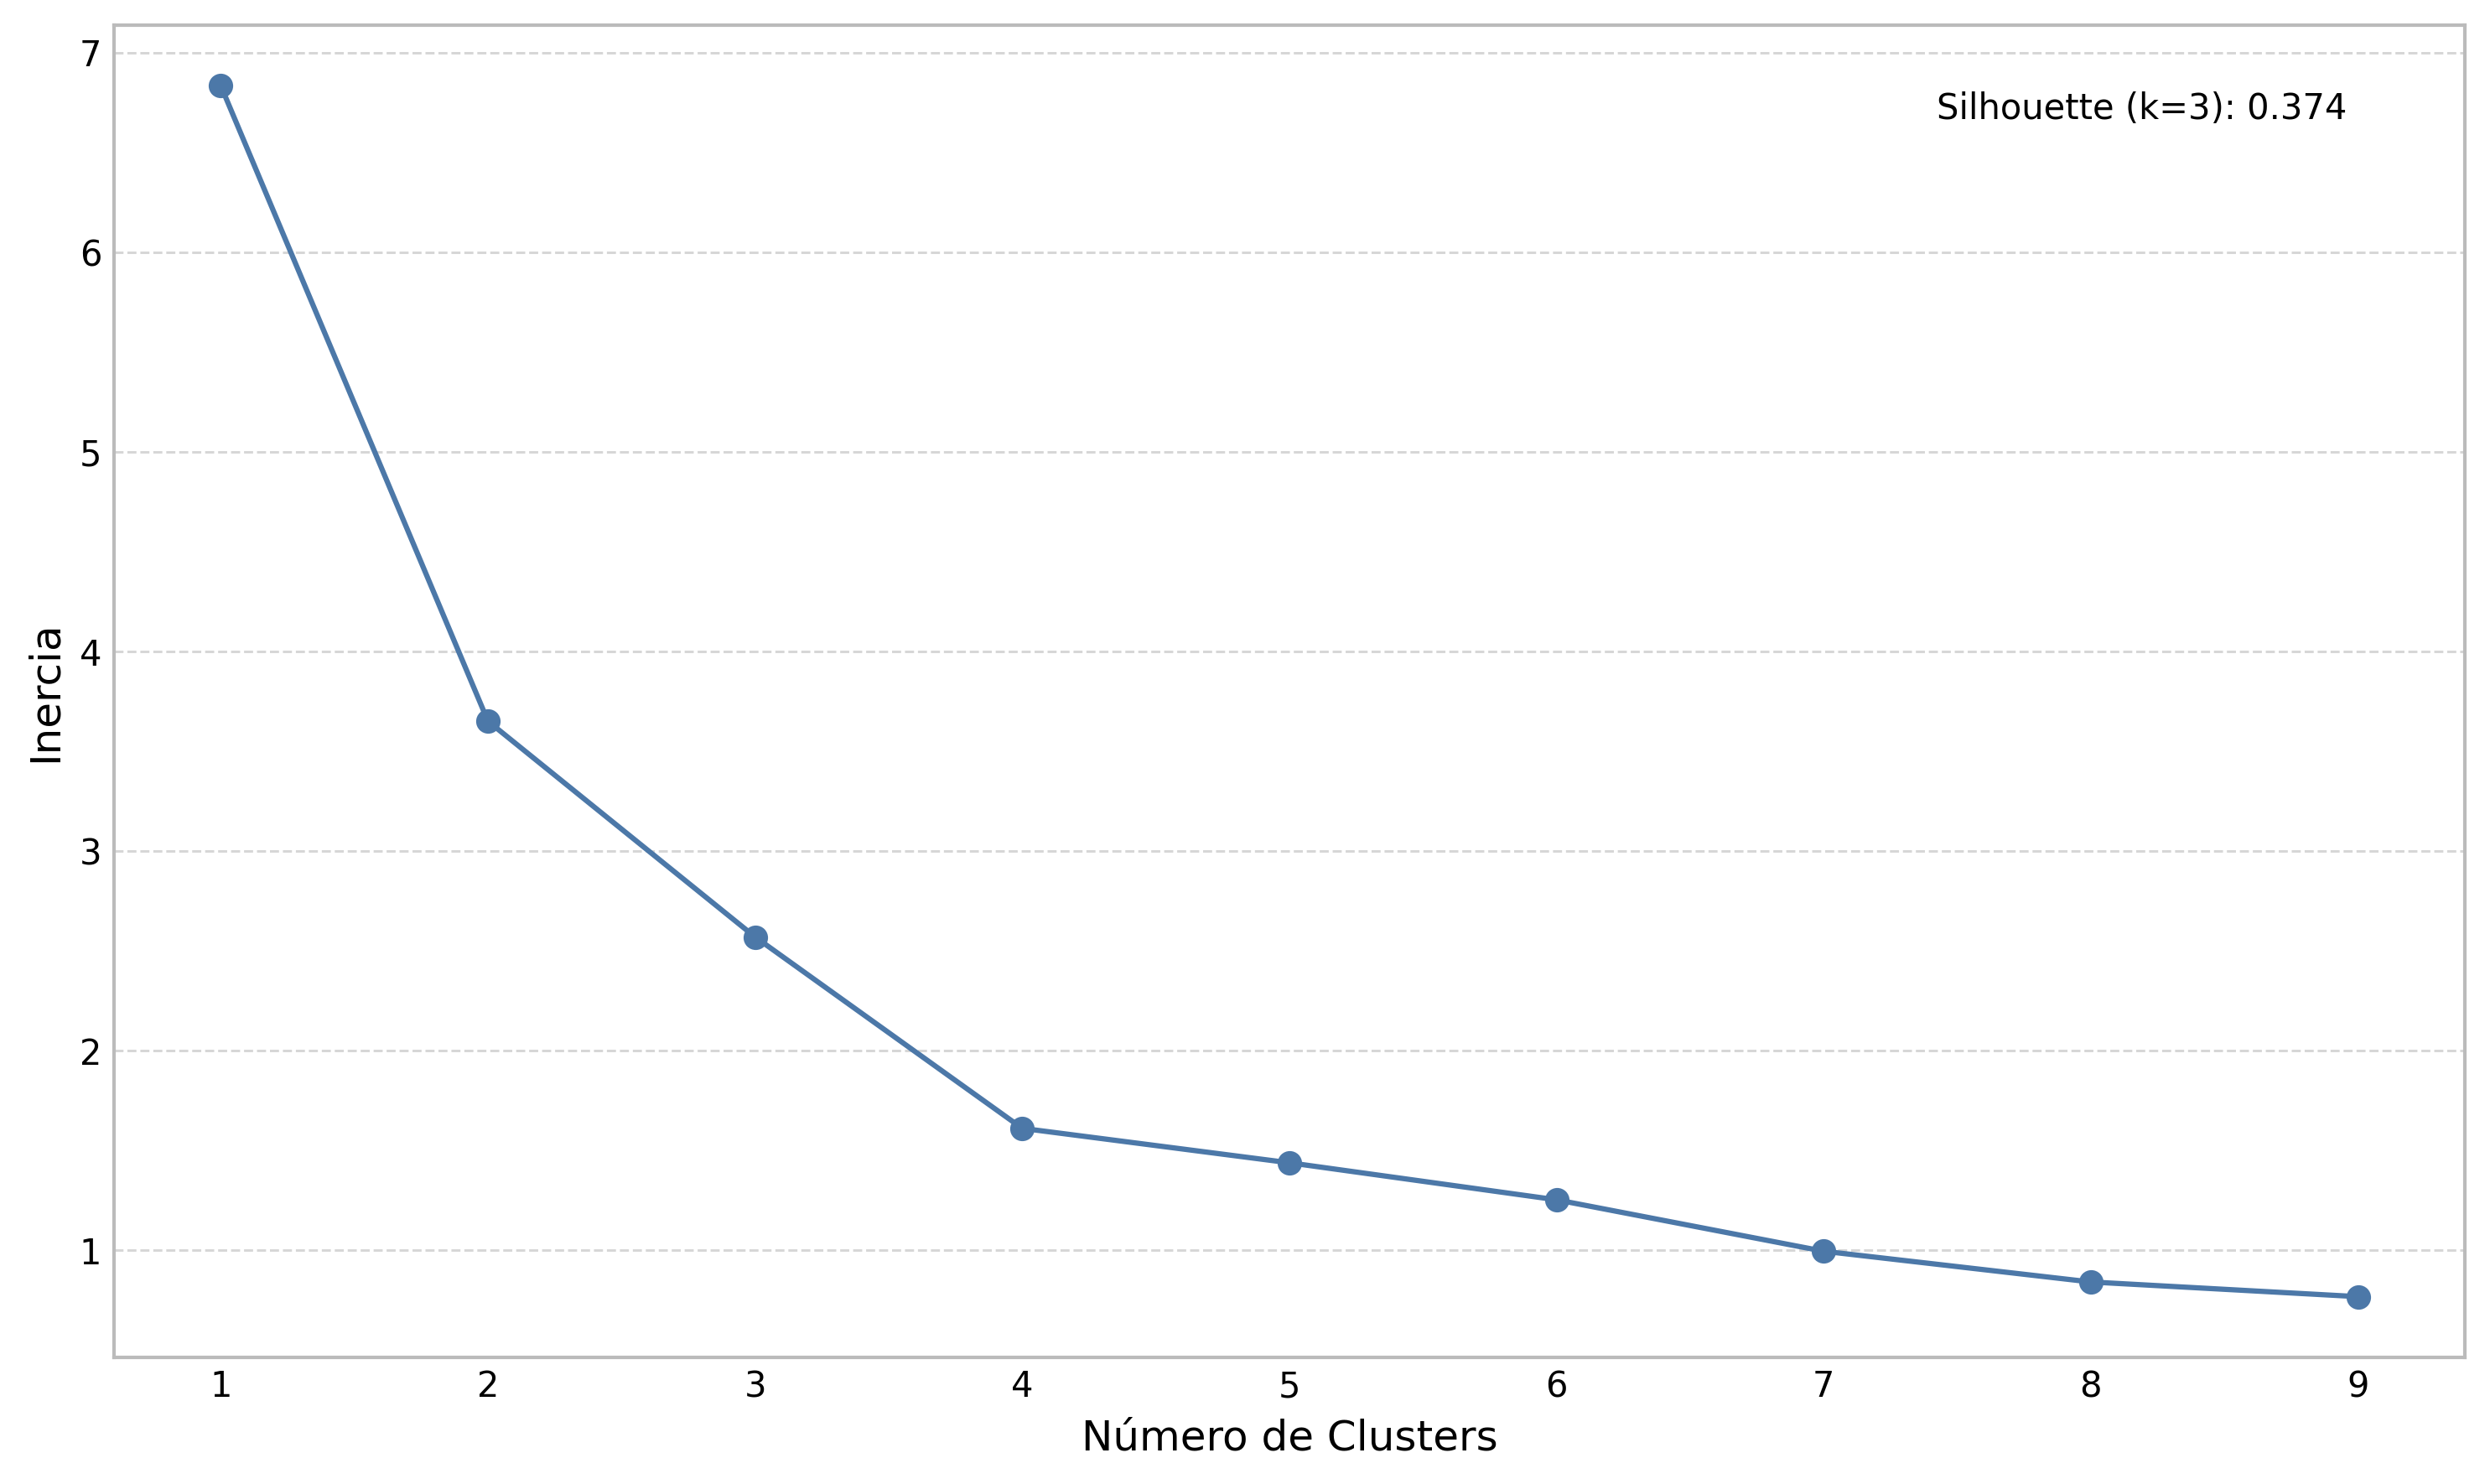

In [70]:
from sklearn.metrics import silhouette_score

# Calculamos silhouette score
score = silhouette_score(embeddings, etiquetas_cluster)

# Calculamos inercia para varios k
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    inertias.append(km.inertia_)


fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
spine_color = '#BBBBBB'

# Spines grises
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(spine_color)
    ax.spines[spine].set_linewidth(1.0)

# Elbow plot
ax.plot(range(1, 10), inertias, marker='o', color='#4C78A8', linewidth=1.5)

# Etiquetas
ax.set_xlabel('Número de Clusters', fontsize=12)
ax.set_ylabel('Inercia', fontsize=12)

# Grid y formato
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6, color=spine_color)
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Mostramos el Silhouette score para k=3
ax.text(0.95, 0.95,
        f'Silhouette (k=3): {score:.3f}',
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Guardamos en pdf y representamos
plt.tight_layout()
plt.savefig("elbow_plot.pdf", format='pdf')
plt.show()


In [83]:
df_clusters = pd.DataFrame({
    'patient_id': df_embeddings.index,
    'cluster': etiquetas_cluster
})

# numero pacientes por cluster
summary = df_clusters['cluster'].value_counts().sort_index().rename("count")
percent = df_clusters['cluster'].value_counts(normalize=True).sort_index().mul(100).round(1).rename("percent")
cluster_summary = pd.concat([summary, percent], axis=1).reset_index().rename(columns={'index':'cluster'})
print(cluster_summary)

   cluster  count  percent
0        0      6     11.3
1        1     24     45.3
2        2     23     43.4


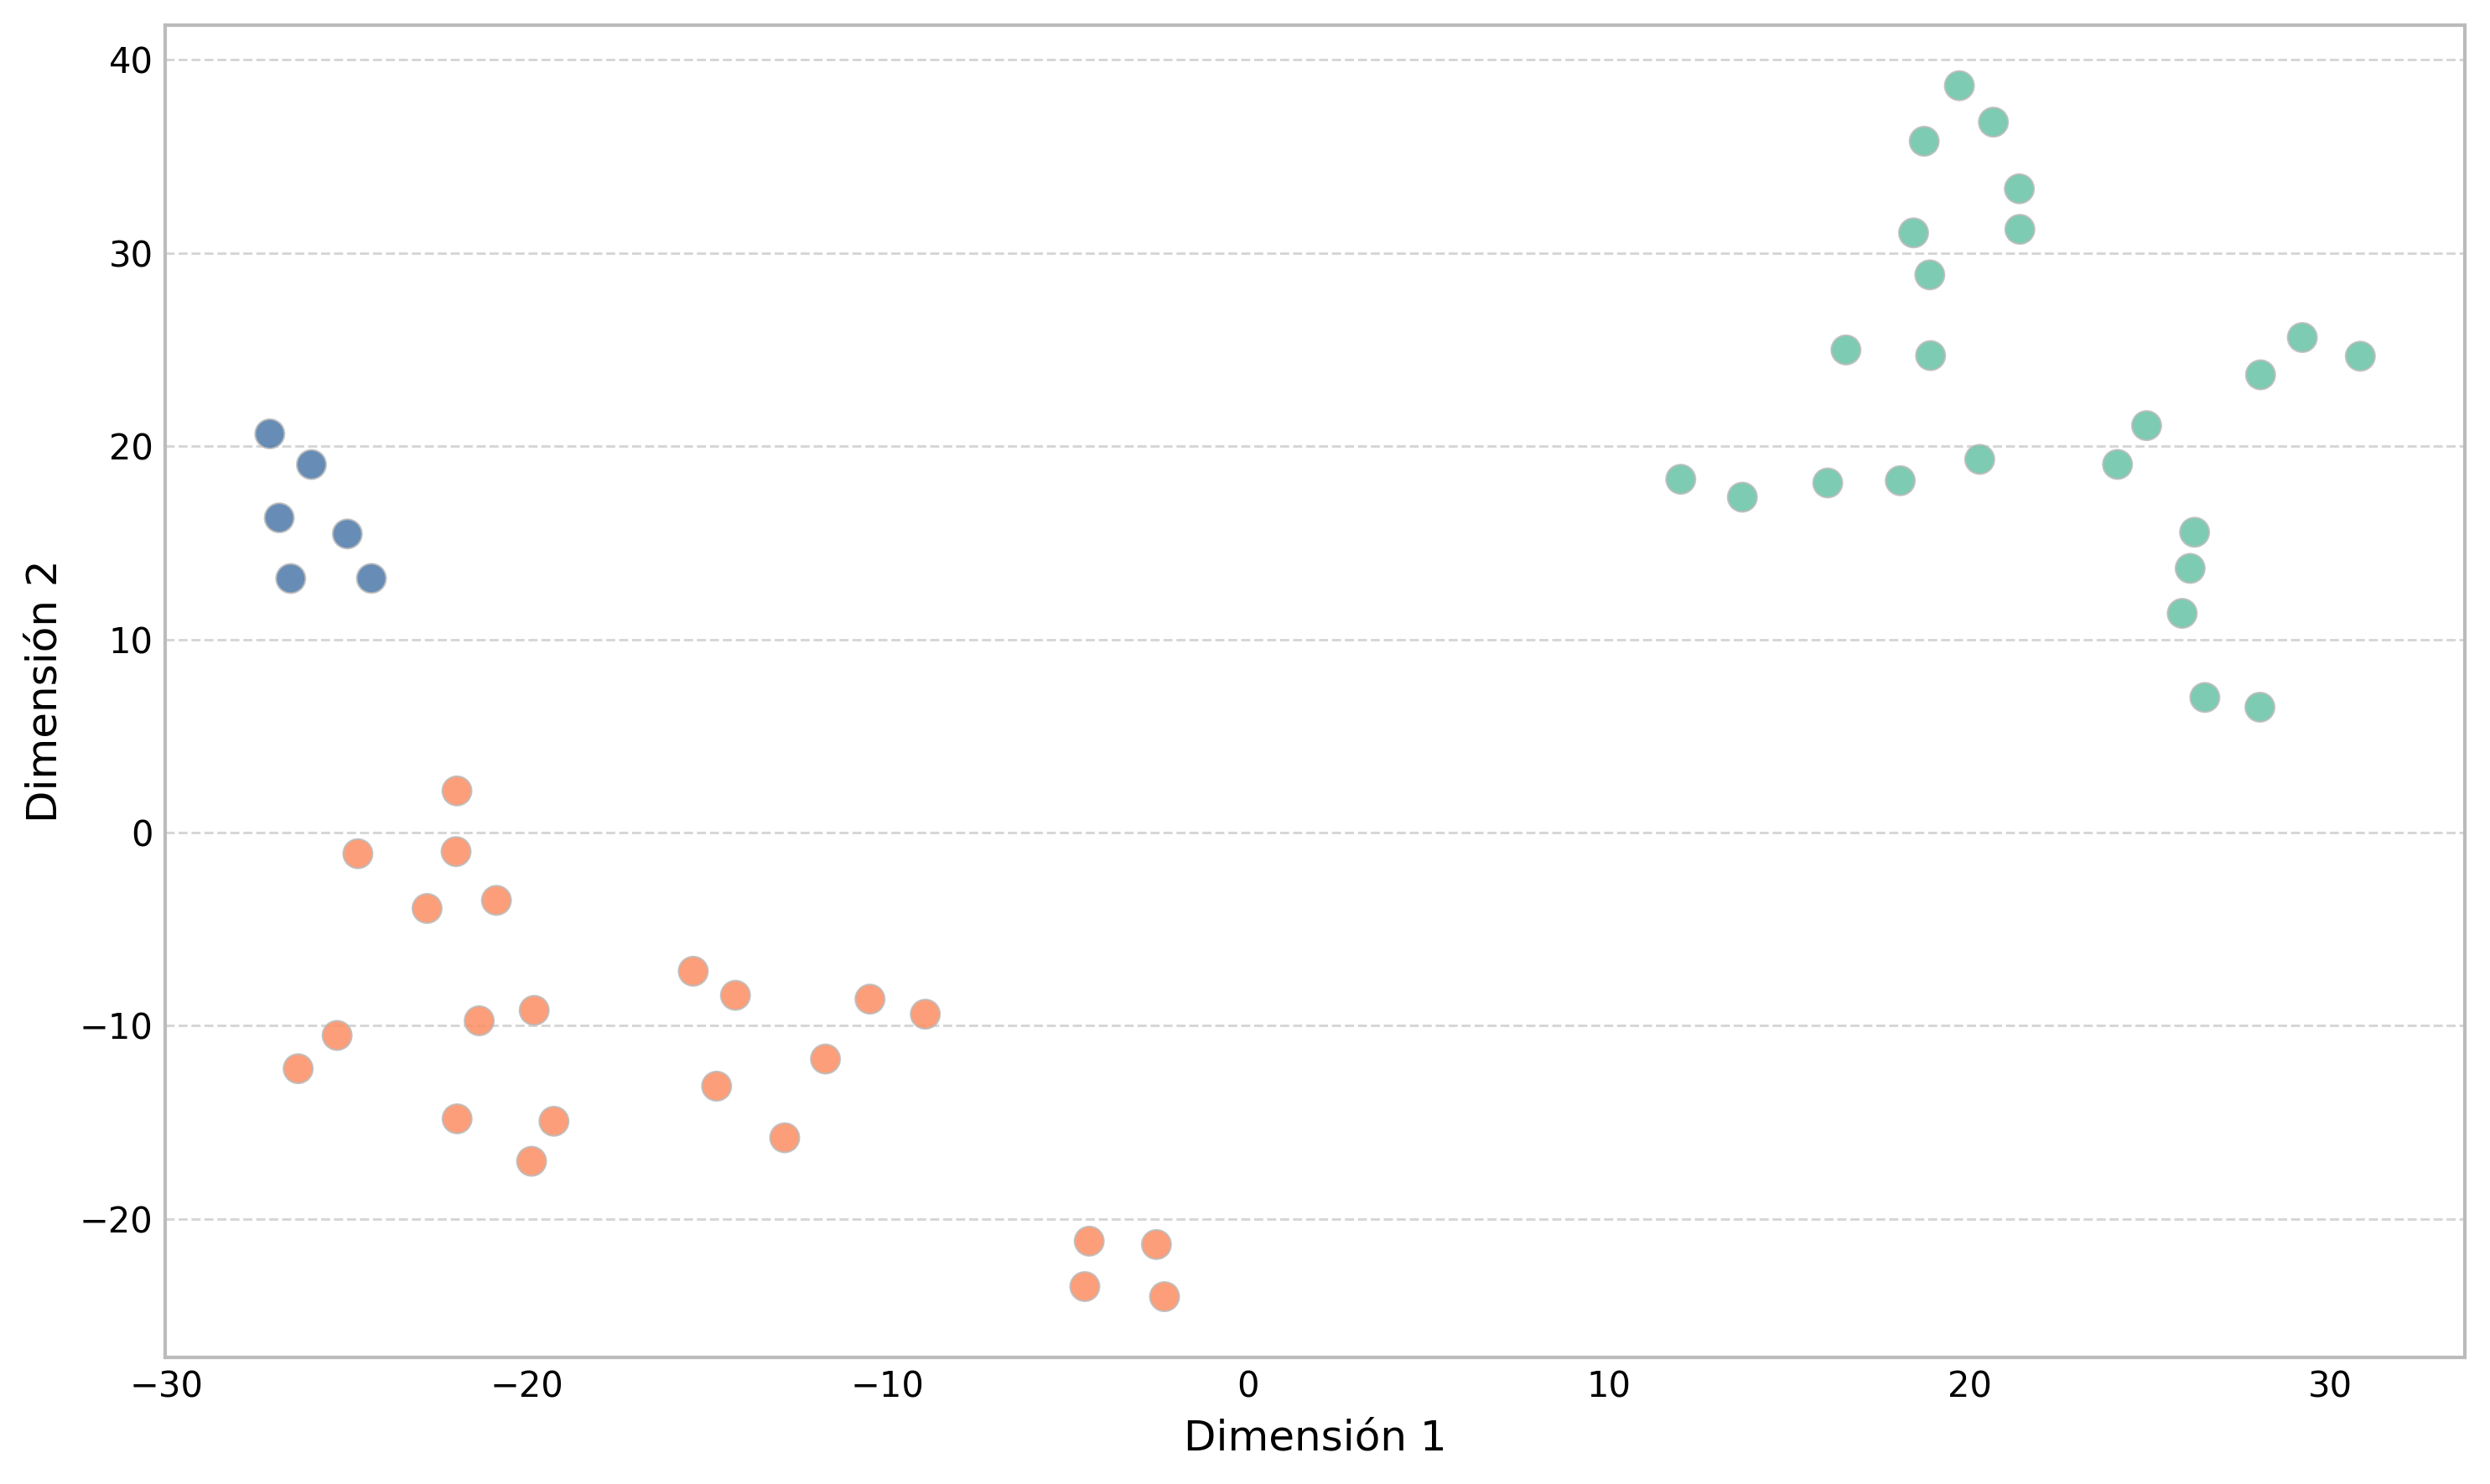

In [72]:
# Reducimos los embeddings a 2D para visualización con t‑SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

# Preparamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
color_borde = '#BBBBBB'
paleta_cluster = ['#4C78A8', '#66c2a5', '#fc8d62']
colores = [paleta_cluster[c] for c in etiquetas_cluster]

# Configuramos los bordes de los ejes
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(color_borde)
    ax.spines[spine].set_linewidth(1.0)

# Dibujamos el scatter con color por cluster
ax.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=colores,
    edgecolor=color_borde,
    linewidth=0.5,
    alpha=0.85,
    s=70,
    zorder=2
)

# Etiquetamos los ejes
ax.set_xlabel('Dimensión 1', fontsize=12)
ax.set_ylabel('Dimensión 2', fontsize=12)

# Cuadrícula horizontal
ax.yaxis.grid(True, color=color_borde, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)

# Ajustamos los ticks
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Guardamos y mostramos la figura
plt.tight_layout()
plt.savefig('kmeans_tsne_clusters.pdf')
plt.show()

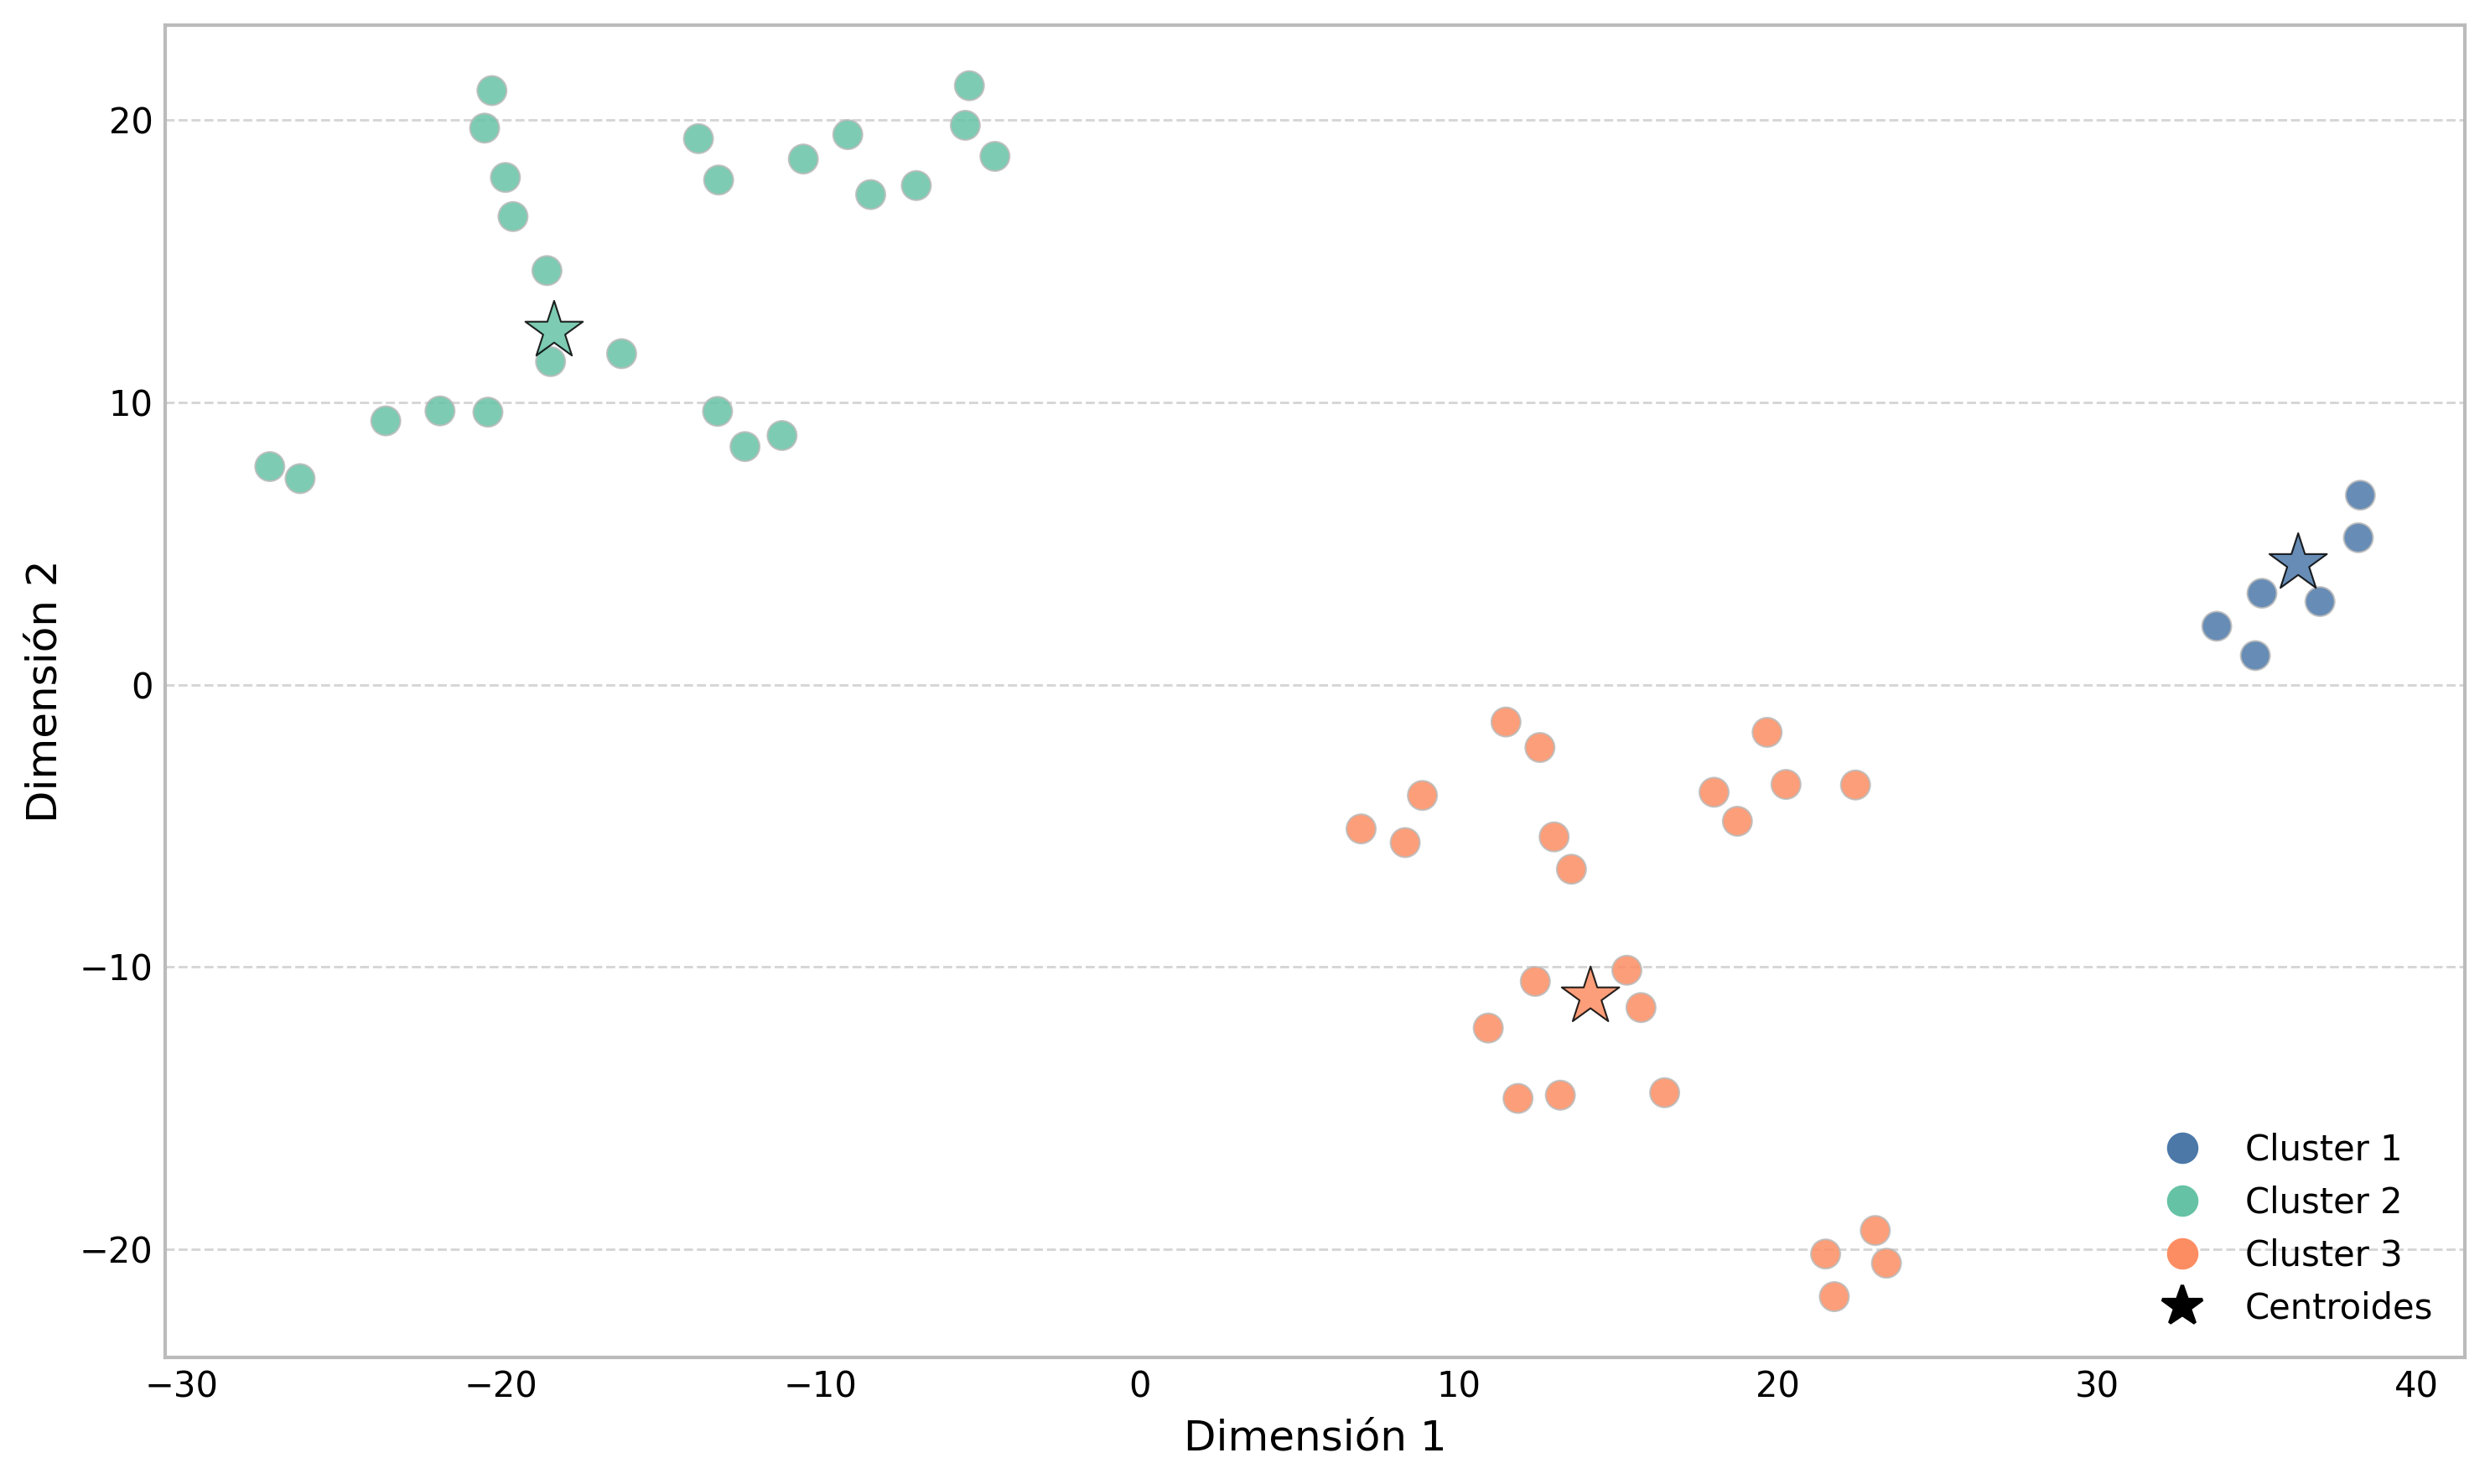

In [73]:
# Proyectamos embeddings y centroides juntos con t-SNE
datos_combinados = np.vstack((embeddings, kmeans.cluster_centers_))
tsne_all = TSNE(n_components=2, random_state=42, perplexity=5)
proyeccion = tsne_all.fit_transform(datos_combinados)
embeddings_2d = proyeccion[:len(pesos_embedding)]
centroides_2d = proyeccion[len(pesos_embedding):]

# Definimos colores para cada cluster
colores_cluster = ['#4C78A8', '#66c2a5', '#fc8d62']
colores_pacientes = [colores_cluster[c] for c in etiquetas_cluster]

# Preparamos la figura con estilo profesional
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
color_borde = '#BBBBBB'

for borde in ['top', 'bottom', 'left', 'right']:
    ax.spines[borde].set_color(color_borde)
    ax.spines[borde].set_linewidth(1.0)

# Dibujamos los puntos de pacientes
ax.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=colores_pacientes,
    edgecolor=color_borde,
    linewidth=0.5,
    alpha=0.85,
    s=70,
    label='Pacientes'
)

# Dibujamos los centroides
ax.scatter(
    centroides_2d[:, 0],
    centroides_2d[:, 1],
    c=colores_cluster,
    marker='*',
    s=300,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.85,
    label='Centroides'
)

# Etiquetas de los ejes y cuadrícula horizontal
ax.set_xlabel('Dimensión 1', fontsize=12)
ax.set_ylabel('Dimensión 2', fontsize=12)
ax.yaxis.grid(True, color=color_borde, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Leyenda
handles = [
    mlines.Line2D([], [], color=colores_cluster[i], marker='o', linestyle='None',
                  markersize=8, label=f'Cluster {i+1}')
    for i in range(len(colores_cluster))
] + [
    mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                  markersize=12, label='Centroides')
]
ax.legend(handles=handles, loc='lower right', frameon=False, fontsize=10)

# Guardamos en PDF y mostramos
plt.tight_layout()
plt.savefig('kmeans_tsne_centroides.pdf')
plt.show()


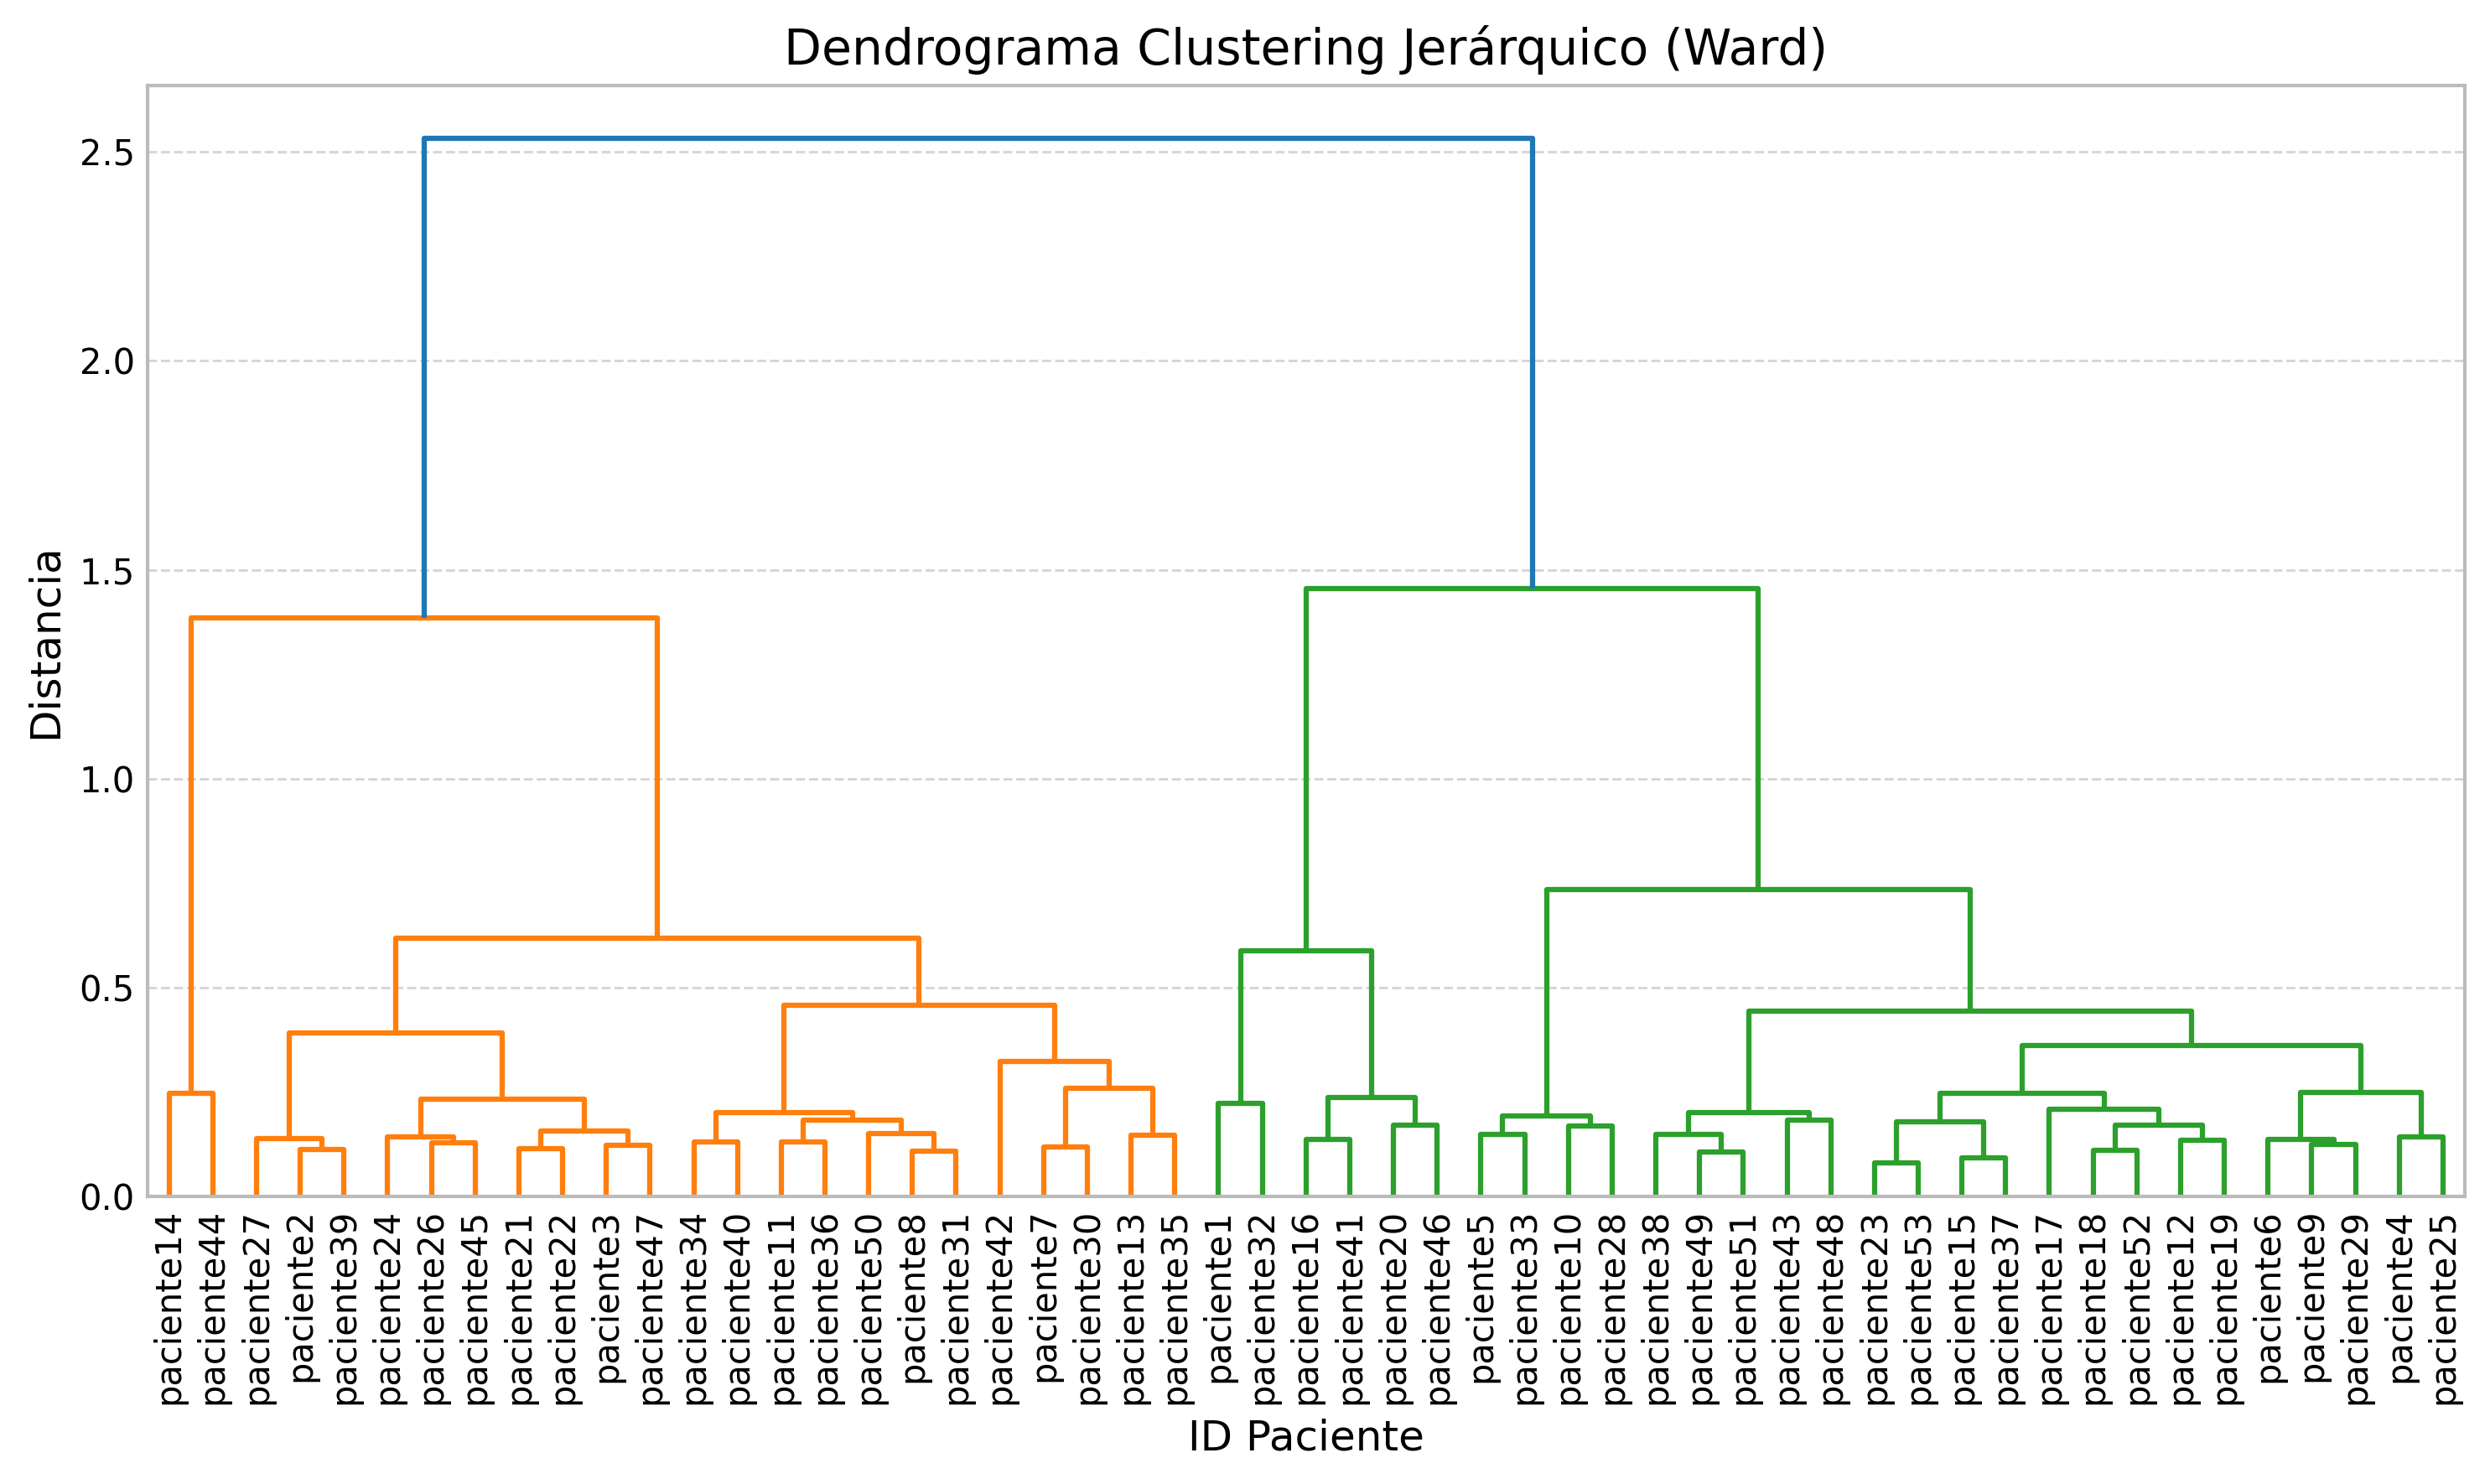

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage

pacientes = [f'paciente{i}' for i in range(1, pesos_embedding.shape[0] + 1)]
# Calculamos el linkage con el método de Ward
Z = linkage(pesos_embedding, method='ward')

# Creamos figura y eje con estilo profesional
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
border_color = '#BBBBBB'

# Configuramos los bordes de los ejes
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color(border_color)
    ax.spines[spine].set_linewidth(1.0)

# Dibujamos el dendrograma
dendrogram(
    Z,
    labels=pacientes,
    leaf_rotation=90,
    ax=ax
)

# Etiquetas y título
ax.set_xlabel('ID Paciente', fontsize=12)
ax.set_ylabel('Distancia', fontsize=12)
ax.set_title('Dendrograma Clustering Jerárquico (Ward)', fontsize=14)

# Cuadrícula horizontal debajo de los datos
ax.yaxis.grid(True, color=border_color, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)

# Ajuste de ticks (sin guiones)
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

# Guardamos en PDF y mostramos
plt.tight_layout()
plt.savefig('dendrograma_ward.pdf')
plt.show()


In [88]:
# Cargamos la información clínica de los pacientes
ruta_csv = '/content/drive/My Drive/TFG/Datos/Info_Pacientes.csv'
df_clinicos = pd.read_csv(ruta_csv)

# Definimos funciones de clasificación
def clasificar_peso(p):
    if p < 50:
        return 'Bajo peso'
    elif p < 70:
        return 'Peso normal'
    elif p < 90:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

def clasificar_talla(t):
    if t < 1.60:
        return 'Baja'
    elif t < 1.75:
        return 'Media'
    else:
        return 'Alta'

def clasificar_imc(i):
    if i < 18.5:
        return 'Bajo peso'
    elif i < 25:
        return 'Normal'
    elif i < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

def clasificar_hba1c(h):
    if h < 6.5:
        return 'Control óptimo'
    elif h < 7.5:
        return 'Control aceptable'
    elif h < 9.0:
        return 'Control mejorable'
    else:
        return 'Mal control'

def binarizar(valor):
    if pd.isna(valor):
        return 'No'
    return 'Sí' if str(valor).strip().lower() in ['sí','si','1','true','checked'] else 'No'

def simplificar_tipo_diabetes(t):
    t = str(t).lower()
    if 'tipo 1' in t:
        return 'DM1'
    if 'lada' in t:
        return 'LADA'
    return 'Otro'

# Aplicamos las clasificaciones
df_info = pd.DataFrame({
    'Record ID': df_clinicos['Record ID'],
    'Genero': df_clinicos['Sexo'].replace({'Mujer':'Mujer','Varón':'Varón'}),
    'Rango_Peso': df_clinicos['Peso actual (kg)'].apply(clasificar_peso),
    'Rango_Talla': df_clinicos['Talla (m)'].apply(clasificar_talla),
    'Categoria_IMC': df_clinicos['IMC'].apply(clasificar_imc),
    'Control_HbA1c': df_clinicos['Promedio de hemoglobinas glicadas'].apply(clasificar_hba1c),
    'Comp_Micro': df_clinicos['¿Existen complicaciones microvasculares?'].apply(binarizar),
    'Comp_Macro': df_clinicos['¿Existen complicaciones macrovasculares?'].apply(binarizar),
    'Tipo_Diabetes': df_clinicos['Tipo de diabetes'].apply(simplificar_tipo_diabetes)
})

# Añadimos la etiqueta de cluster
df_info['Cluster'] = etiquetas_cluster

In [90]:
# Calcular porcentajes por cluster para cada variable categórica
columnas = ['Genero', 'Categoria_IMC', 'Control_HbA1c', 'Comp_Micro', 'Comp_Macro', 'Tipo_Diabetes']
tablas_porcentajes = {}

for col in columnas:
    tabla = pd.crosstab(df_info['Cluster'], df_info[col], normalize='index') * 100
    tablas_porcentajes[col] = tabla.round(2)

In [92]:
#tablas_porcentajes['Genero']
tablas_porcentajes['Categoria_IMC']
#tablas_porcentajes['Control_HbA1c']
#tablas_porcentajes['Tipo_Diabetes']
#tablas_porcentajes['Comp_Macro']
#tablas_porcentajes['Comp_Micro']

Categoria_IMC,Bajo peso,Normal,Obesidad,Sobrepeso
Cluster,,,,
0,0.00,66.67,16.67,16.67
1,4.17,29.17,25.00,41.67
2,0.00,26.09,21.74,52.17
